In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pylab
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (14, 8)

import wrangle

In [2]:
aquifer, temps, precip, pop, usage = wrangle.get_dataframes()

In [3]:
aquifer, weather, pop, usage = wrangle.clean_all_dataframes(aquifer, temps, precip, pop, usage)

In [4]:
aquifer.info(), weather.info(), pop.info(), usage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31919 entries, 1932-11-12 to 2022-06-12
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   water_level_elevation  31919 non-null  float64
dtypes: float64(1)
memory usage: 498.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1529 entries, 1895-01-01 to 2022-05-01
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_monthly_temp      1529 non-null   float64
 1   total_monthly_precip  1529 non-null   float64
dtypes: float64(2)
memory usage: 35.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 1850-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   population  38 non-null     int64
dtypes: int64(1)
memory usage: 608.0 bytes
<class 'pandas.core.frame.

(None, None, None, None)

### Univariate display of all data

since I have all numerical data I will be using describe and histplots

**Starting with Aquifer**

<AxesSubplot:ylabel='Frequency'>

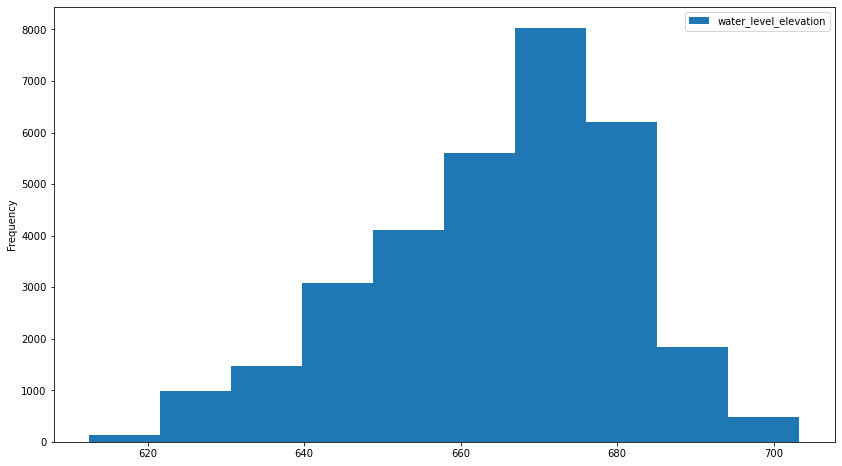

In [5]:
aquifer.plot(kind= 'hist')

In [6]:
aquifer.describe().T

count        mean        std     min     25%     50%  \
water_level_elevation  31919.0  664.944913  16.189777  612.51  654.25  667.67   

                          75%     max  
water_level_elevation  676.57  703.31

Main aquifer dataset is relatively normal with some left skew.

**Moving to weather**

<AxesSubplot:ylabel='Frequency'>

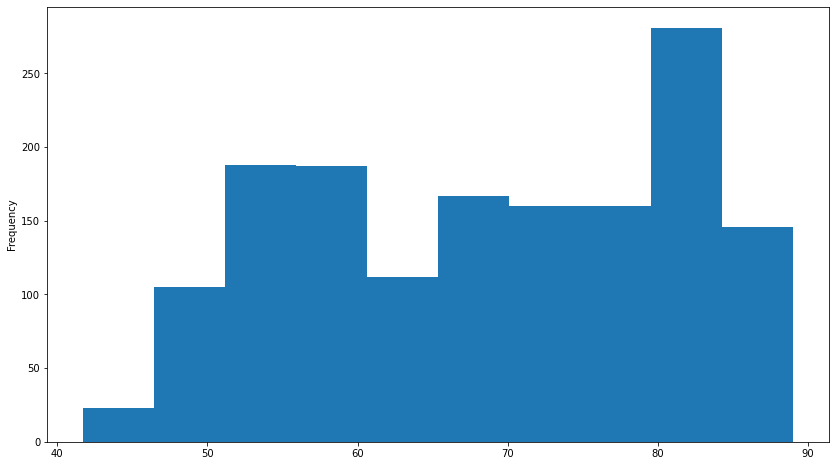

In [7]:
weather.avg_monthly_temp.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

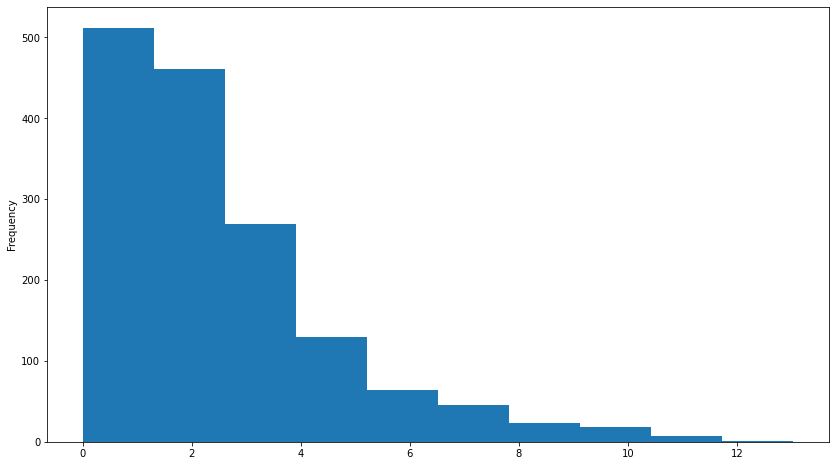

In [8]:
weather.total_monthly_precip.plot(kind = 'hist')

In [9]:
weather.describe().T

count       mean        std   min    25%   50%    75%  \
avg_monthly_temp      1529.0  68.675932  12.233472  41.7  57.20  69.5  80.40   
total_monthly_precip  1529.0   2.479922   2.088409   0.0   0.97   2.0   3.36   

                        max  
avg_monthly_temp      89.00  
total_monthly_precip  13.03

Temp is somewhat uniform with a spike in the 80s and precipitation is hard right skewed with most data coming in around 0-2

**Visualizing population**

<AxesSubplot:ylabel='Frequency'>

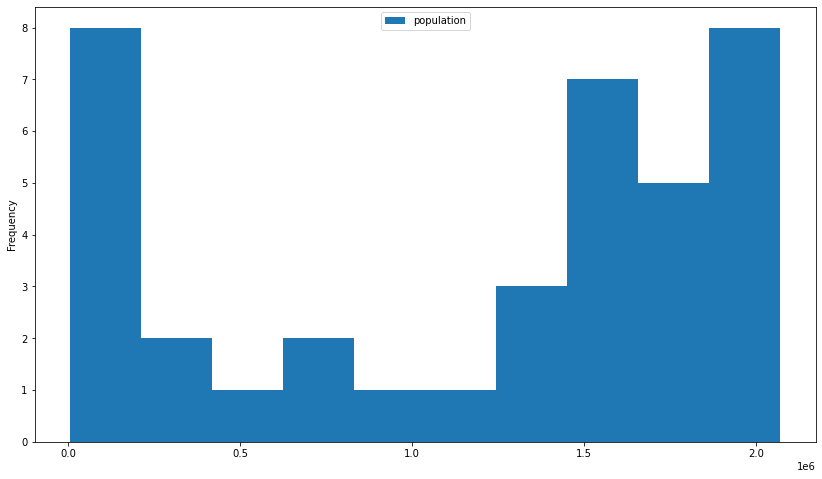

In [10]:
pop.plot(kind = 'hist')

I realized this data isn't exactly "right" as I have population as a change in decade up to 2000 after which it's by year. So I need to resample to 10 years and plot again to see actual distribution.

<AxesSubplot:ylabel='Frequency'>

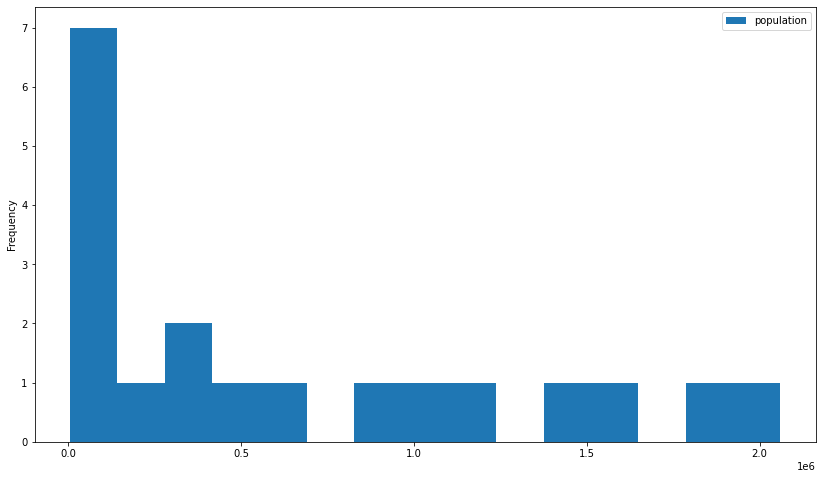

In [11]:
# I'm also changing the bins here
pop.resample('10Y').mean().plot(kind='hist', bins = 15)

In [12]:
pop.resample('10Y').mean().describe().T

count           mean            std     min      25%       50%  \
population   19.0  643587.526316  681896.876231  6052.0  59344.0  338176.0   

                  75%        max  
population  1087095.0  2059475.0

This data would be better represented as a lineplot which I will do after finishing all histograms.

In [13]:
usage.head()

municipal  manufacturing  mining  power  irrigation  livestock  \
date                                                                         
1984-01-01     252584          11445     259  33106       40347       1635   
1985-01-01     231034          12516    2763  27438       29411       1390   
1986-01-01     235506          14000       0  23840       31710       1466   
1987-01-01     229866          10661    1613  26735       23368       1226   
1988-01-01     250563          13675    1729  34277       24130       1283   

            municipal_ground_water  municipal_surface_water  mfg_ground_water  \
date                                                                            
1984-01-01                  252273                      311             11005   
1985-01-01                  230794                      240             12471   
1986-01-01                  235293                      213             13680   
1987-01-01                  229575                      291             10555   
1988-01-01                  250269                      294             13523   

            mfg_surface_water  mining_ground_water  mining_surface_water  \
date                                                                       
1984-01-01                440                  259                     0   
1985-01-01                 45                 2564                   199   
1986-01-01                320                    0                     0   
1987-01-01                106                 1370                   243   
1988-01-01                152                 1462                   267   

            power_ground_water  power_surface_water  irrigation_ground_water  \
date                                                                           
1984-01-01                1300                31806                    23489   
1985-01-01                1974                25464                    16967   
1986-01-01                1859                21981                    16610   
1987-01-01                2013                24722                    12949   
1988-01-01                1400                32877                    15595   

            irrigation_surface_water  livestock_ground_water  \
date                                                           
1984-01-01                     16858                     162   
1985-01-01                     12444                     138   
1986-01-01                     15100                     146   
1987-01-01                     10419                     122   
1988-01-01                      8535                     128   

            livestock_surface_water  total_consumption  
date                                                    
1984-01-01                     1473             339376  
1985-01-01                     1252             304552  
1986-01-01                     1320             306522  
1987-01-01                     1104             293469  
1988-01-01                     1155             325657

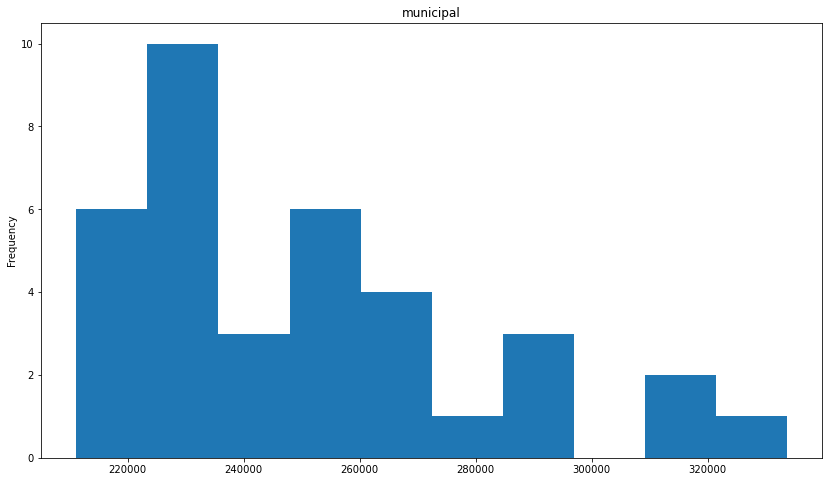

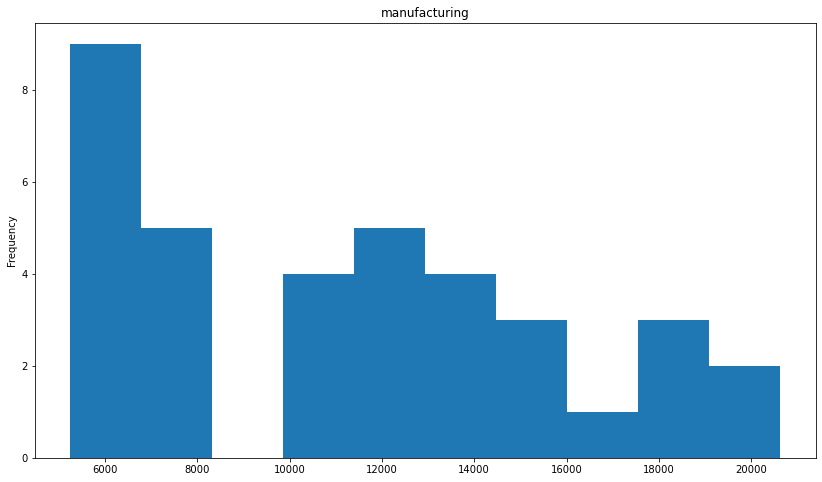

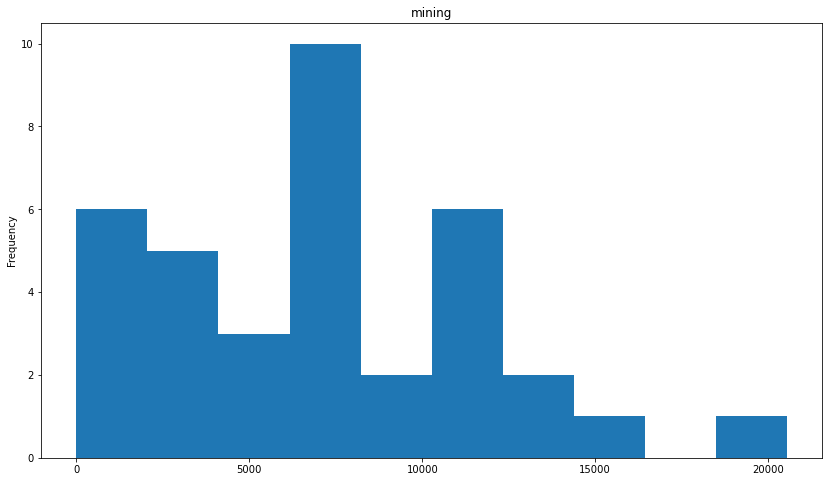

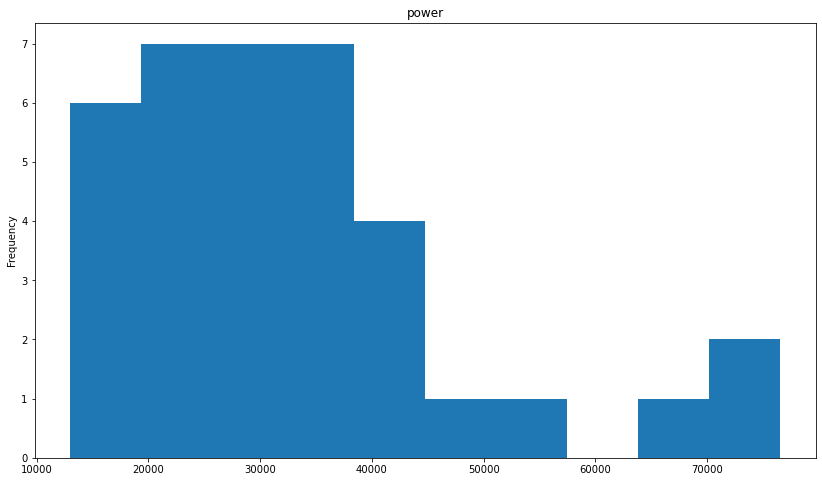

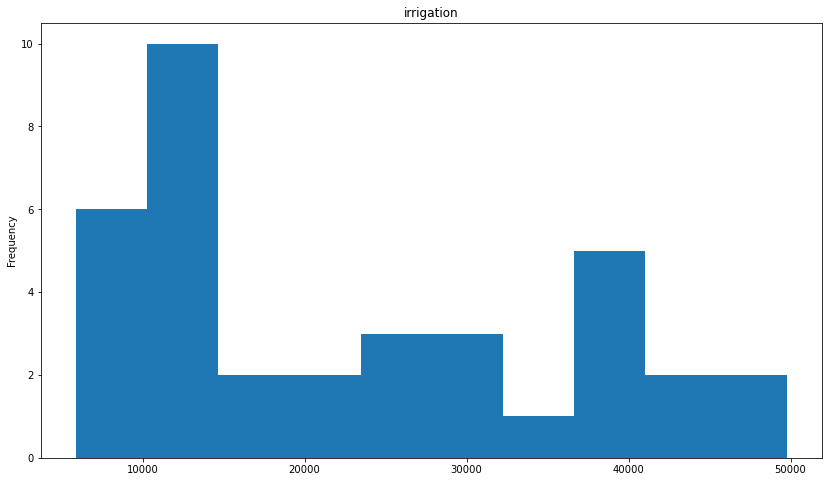

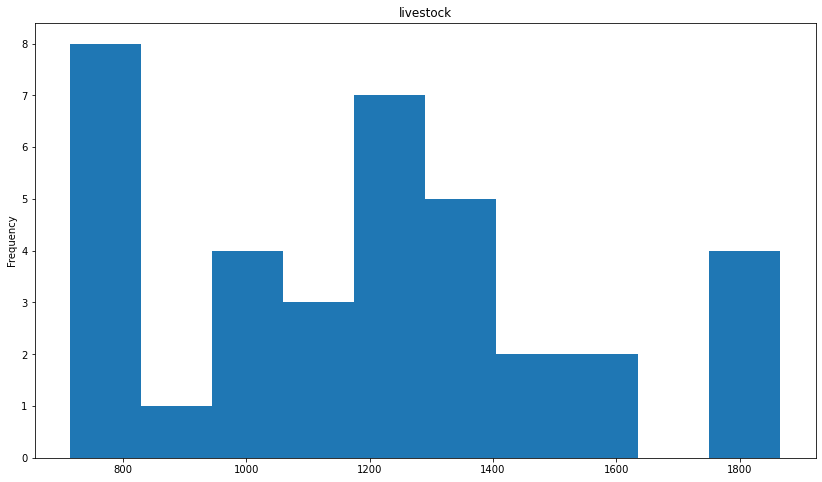

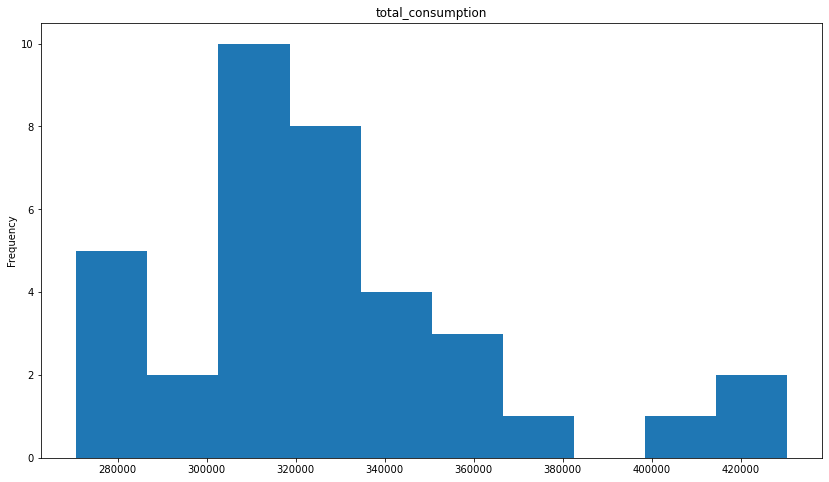

In [14]:
# Setting a list of columns I want to visualize from usage
usage_cols = ['municipal','manufacturing', 'mining', 'power', 'irrigation', 'livestock', 'total_consumption']

for col in usage_cols:
    usage[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [15]:
usage[usage_cols].describe().T

count           mean           std       min        25%  \
municipal           36.0  250906.444444  30734.155561  211173.0  229670.00   
manufacturing       36.0   11299.222222   4541.183937    5247.0    7031.25   
mining              36.0    7010.777778   4609.781254       0.0    3456.75   
power               36.0   32698.361111  15185.368347   12987.0   23236.50   
irrigation          36.0   23291.361111  13301.226906    5910.0   11868.50   
livestock           36.0    1211.250000    339.210544     714.0     958.75   
total_consumption   36.0  326417.416667  37879.967373  270765.0  304393.25   

                        50%        75%       max  
municipal          242693.0  265376.00  333637.0  
manufacturing       11348.5   14247.75   20627.0  
mining               6629.5   10459.00   20533.0  
power               27318.5   37744.25   76538.0  
irrigation          20463.5   35494.00   49761.0  
livestock            1219.5    1389.25    1866.0  
total_consumption  319857.5  340853.50  430351.0

# Lineplots
Since this is all historical date driven data, Lineplots would probably tell a better story here.

<AxesSubplot:xlabel='date'>

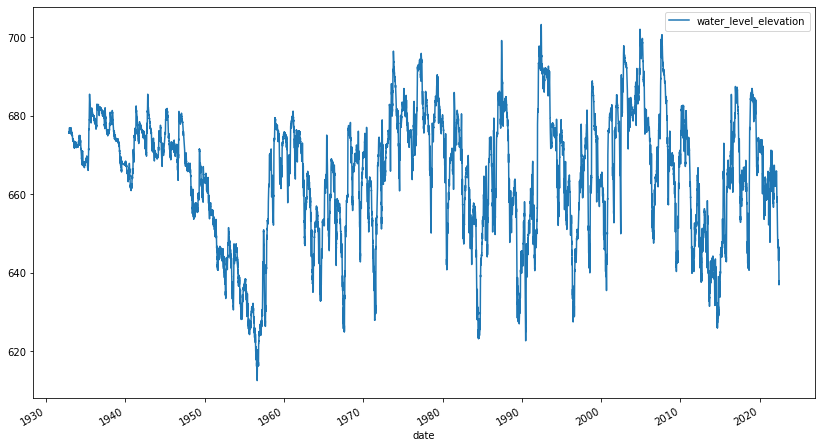

In [16]:
# Visualizing Aquifer level over time
aquifer.plot()

<AxesSubplot:xlabel='date'>

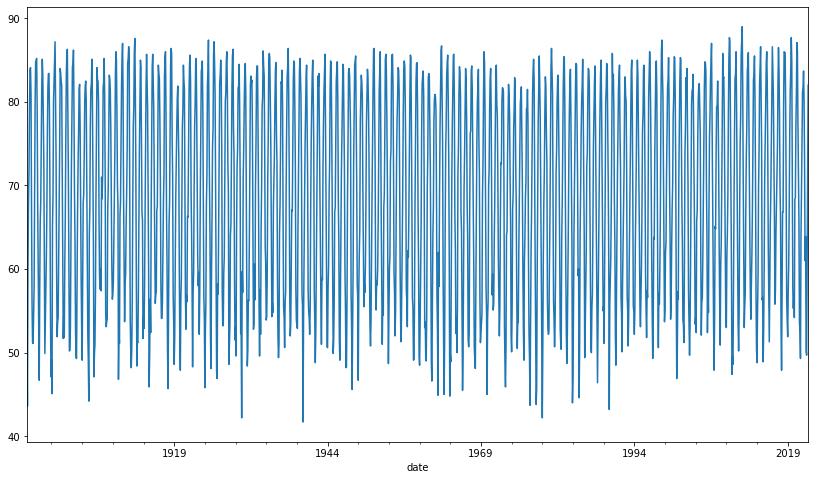

In [17]:
# Visualizing average monthly temperature over time
weather.avg_monthly_temp.plot()

<AxesSubplot:xlabel='date'>

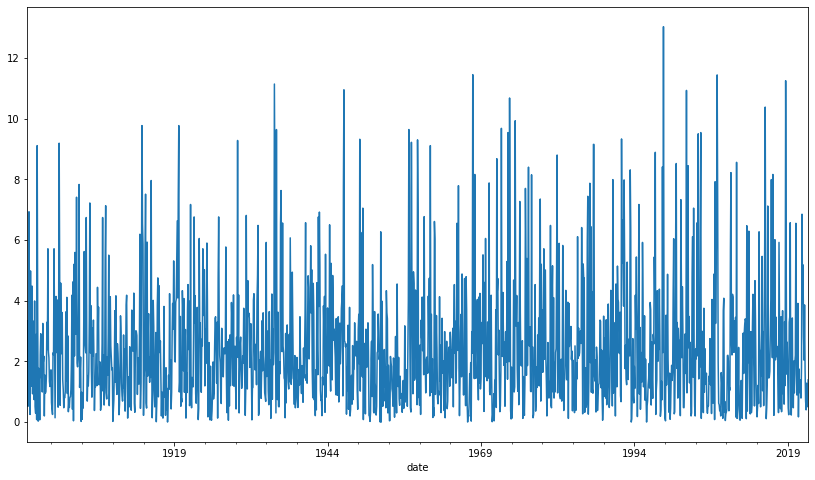

In [18]:
# Visualizing total monthly precipitation over time
weather.total_monthly_precip.plot()

<AxesSubplot:xlabel='date'>

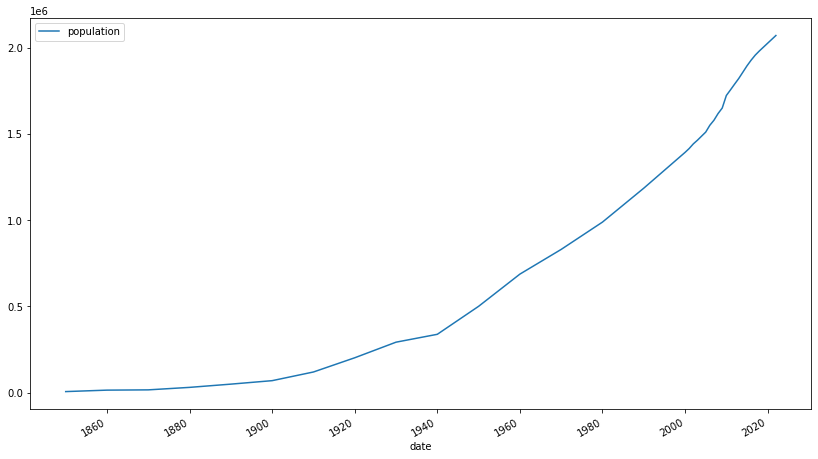

In [19]:
# Visualizing population over time
pop.plot()

<AxesSubplot:xlabel='date'>

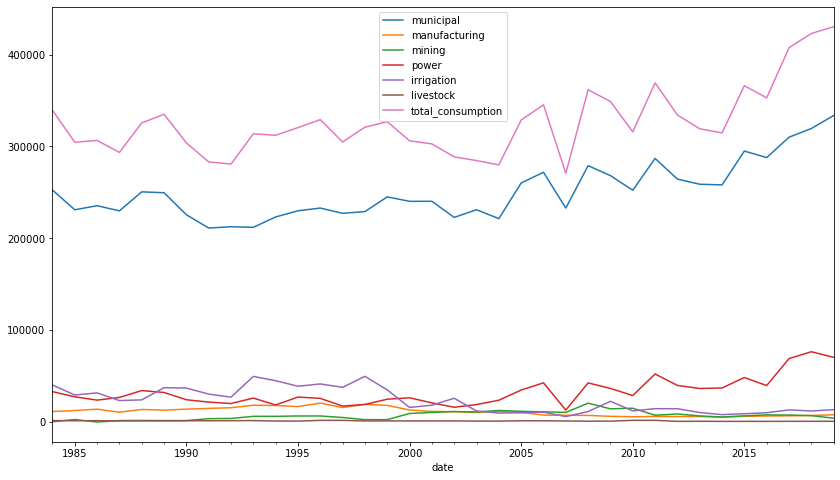

In [20]:
# Visualizing water usage over time
usage[usage_cols].plot()

Before exploring anything else I need to determine how I will split the data for training and test. So I will look at the time series target again.

<AxesSubplot:xlabel='date'>

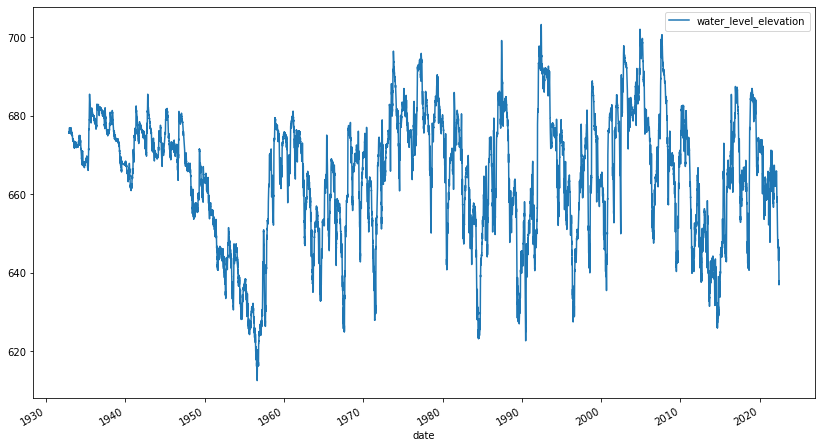

In [21]:
aquifer.plot()

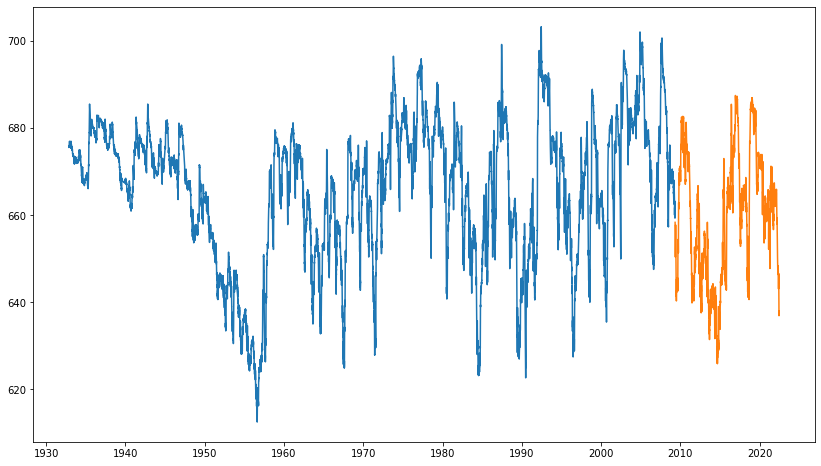

In [22]:
train_size = .85
n = aquifer.shape[0]
test_start_index = round(train_size * n)

train = aquifer[:test_start_index] # everything up (not including) to the test_start_index
test = aquifer[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.water_level_elevation)
plt.plot(test.index, test.water_level_elevation)

In [23]:
train.head(1),train.tail(1), test.head(1), test.tail(1)

(            water_level_elevation
 date                             
 1932-11-12                  675.6,
             water_level_elevation
 date                             
 2009-05-03                 659.67,
             water_level_elevation
 date                             
 2009-05-04                 658.37,
             water_level_elevation
 date                             
 2022-06-12                 637.95)

Train now extends from 1932-11-12 until 2009-05-03 and test covers the time from 2009-05-04 to 2022-06-12.

I will now use train for exploration of the data.

I want to resample and interpolate the population data so I can use it later to compare with aquifer data.

In [24]:
resampled_pop = pop.resample('D').mean().interpolate(method='polynomial', order=2).astype('int64')

resampled_pop

population
date                  
1850-01-01        6052
1850-01-02        6055
1850-01-03        6059
1850-01-04        6063
1850-01-05        6066
...                ...
2021-12-28     2070414
2021-12-29     2070475
2021-12-30     2070537
2021-12-31     2070598
2022-01-01     2070660

[62823 rows x 1 columns]

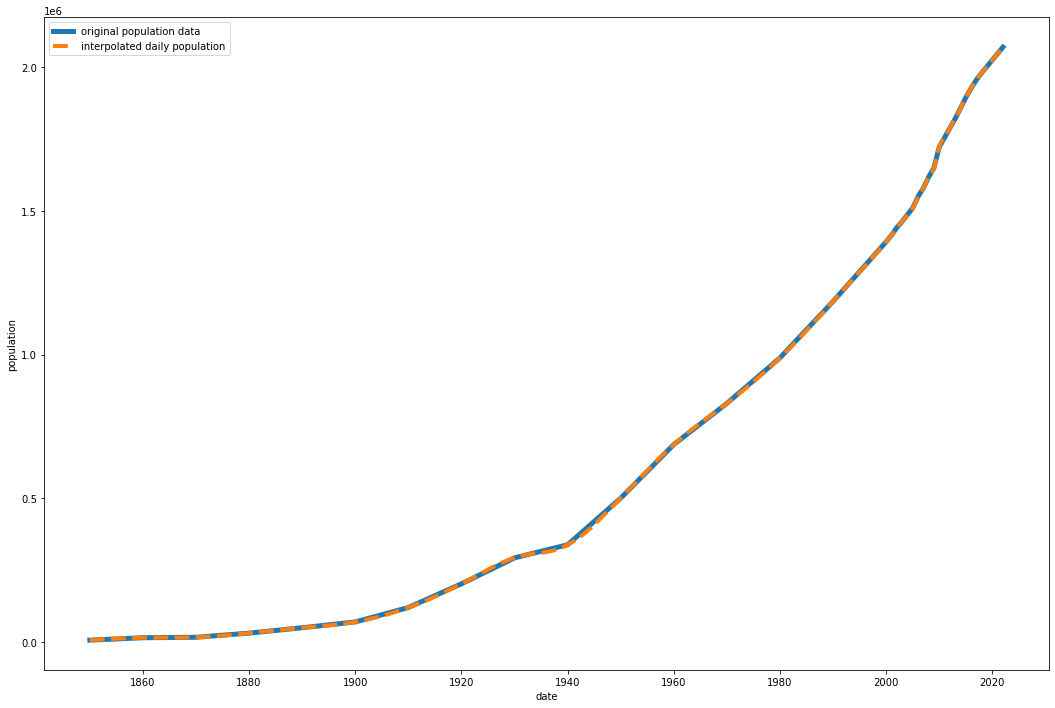

In [25]:
#Visualizing the original population line vs the interpolated daily population
plt.figure(figsize=(18,12))
sns.lineplot(data = pop, y = 'population', x='date', label = 'original population data', lw=5)
sns.lineplot(data = resampled_pop, y = 'population', x ='date', label = 'interpolated daily population',ls ='--', lw=4)
plt.legend()
plt.show()

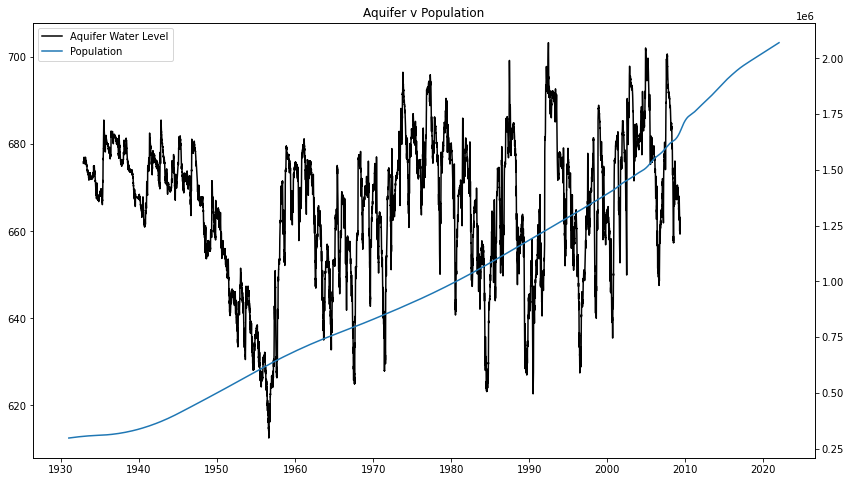

In [26]:
# plotting population values with Aquifer water levels to see if there is any specific relationship visually apparent

ax1 = plt.subplot()
l1, = ax1.plot(train, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(resampled_pop[resampled_pop.index.year > 1930])

plt.legend([l1, l2], ["Aquifer Water Level", "Population"])
plt.title('Aquifer v Population')

plt.show()

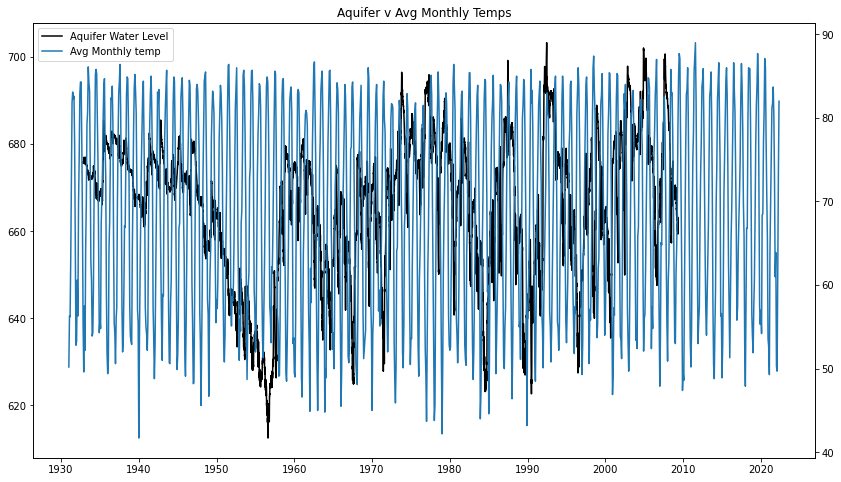

In [27]:
# plotting temperature values with Aquifer water levels to see if there is any specific relationship visually apparent
ax1 = plt.subplot()
l1, = ax1.plot(train, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].avg_monthly_temp)

plt.legend([l1, l2], ["Aquifer Water Level", "Avg Monthly temp"])
plt.title('Aquifer v Avg Monthly Temps')
plt.show()

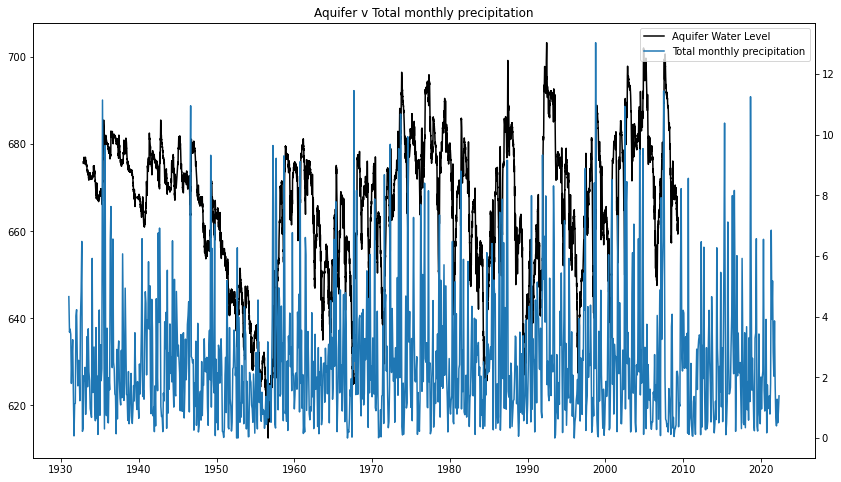

In [28]:
# plotting precipitation values with Aquifer water levels to see if there is any specific relationship visually apparent
ax1 = plt.subplot()
l1, = ax1.plot(train, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].total_monthly_precip)

plt.legend([l1, l2], ["Aquifer Water Level", "Total monthly precipitation"])
plt.title('Aquifer v Total monthly precipitation')
plt.show()


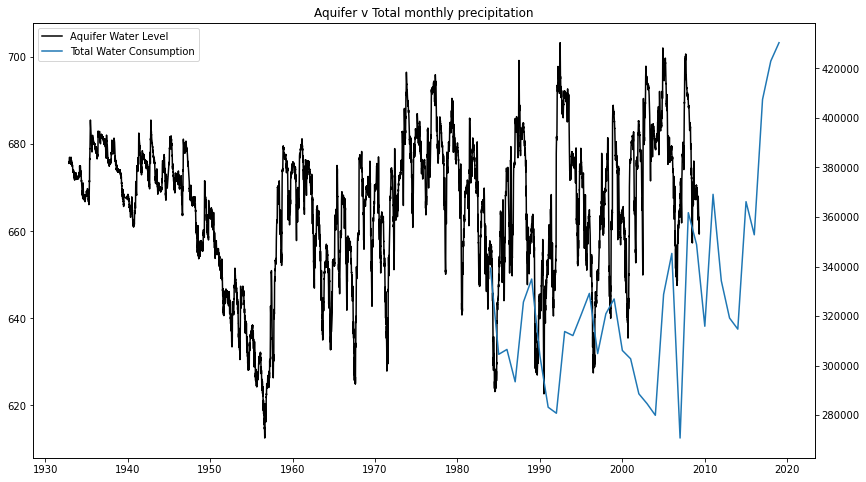

In [29]:
# plotting total water consumption values with Aquifer water levels to see if there is any specific relationship visually apparent
ax1 = plt.subplot()
l1, = ax1.plot(train, color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(usage[usage.index.year > 1930].total_consumption)

plt.legend([l1, l2], ["Aquifer Water Level", "Total Water Consumption"])
plt.title('Aquifer v Total monthly precipitation')
plt.show()


It's hard to tell from these messy graphs, so I am going to resample by 6 months to see if it helps make any more sense.

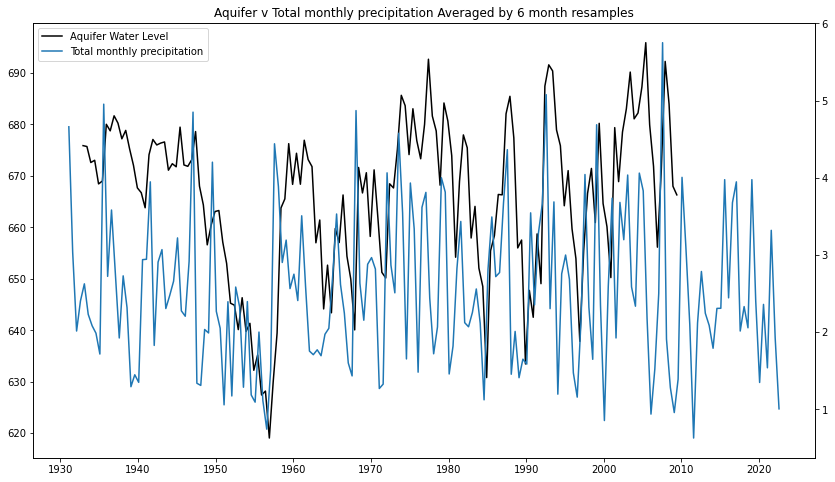

In [30]:
# plotting precipitation values with Aquifer water levels to see if there is any specific relationship visually apparent, resampled
# to six months
ax1 = plt.subplot()
l1, = ax1.plot(train.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].total_monthly_precip.resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Total monthly precipitation"])
plt.title('Aquifer v Total monthly precipitation Averaged by 6 month resamples')
plt.show()


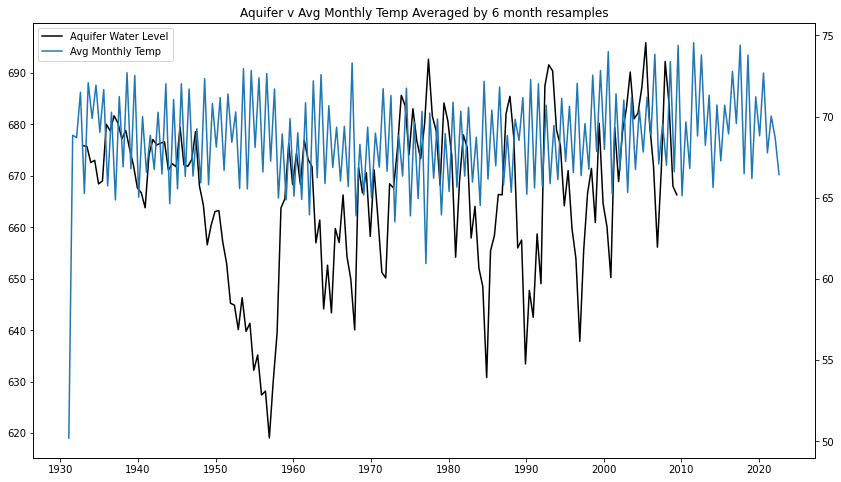

In [31]:
# plotting temperature values with Aquifer water levels to see if there is any specific relationship visually apparent, resampled
# to six months
ax1 = plt.subplot()
l1, = ax1.plot(train.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(weather[weather.index.year > 1930].avg_monthly_temp.resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Avg Monthly Temp"])
plt.title('Aquifer v Avg Monthly Temp Averaged by 6 month resamples')
plt.show()


A pattern has seemingly emerged indicating that precipitation and Aquifer Water Level are linked. This isn't suprising.

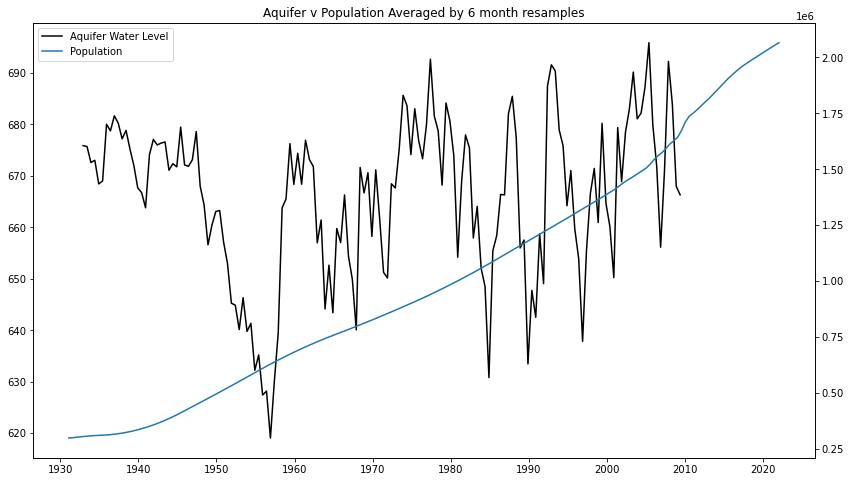

In [32]:
# plotting population values with Aquifer water levels to see if there is any specific relationship visually apparent; resampled
# to 6 months
ax1 = plt.subplot()
l1, = ax1.plot(train.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(resampled_pop[resampled_pop.index.year > 1930].resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Population"])
plt.title('Aquifer v Population Averaged by 6 month resamples')
plt.show()


Population still doesn't look that correlated, I want to explore total consumption now.

In [33]:
# I need to resample and interpolate for the water usage.
resampled_total_consumption = (usage.total_consumption.resample('D').mean()/365).interpolate(method='polynomial', order=2).astype('int64')

resampled_total_consumption


date
1984-01-01     929
1984-01-02     929
1984-01-03     928
1984-01-04     928
1984-01-05     928
              ... 
2018-12-28    1178
2018-12-29    1178
2018-12-30    1178
2018-12-31    1178
2019-01-01    1179
Freq: D, Name: total_consumption, Length: 12785, dtype: int64

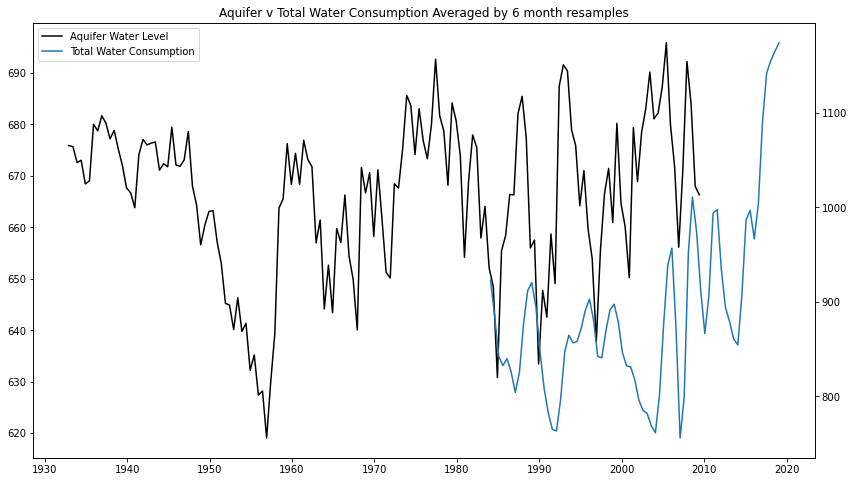

In [34]:
# plotting water consumption values with Aquifer water levels to see if there is any specific relationship visually apparent; resampled
# to 6 months
ax1 = plt.subplot()
l1, = ax1.plot(train.resample('6M').mean(), color='black')
ax2 = ax1.twinx()
l2, = ax2.plot(resampled_total_consumption.resample('6M').mean())

plt.legend([l1, l2], ["Aquifer Water Level", "Total Water Consumption"])
plt.title('Aquifer v Total Water Consumption Averaged by 6 month resamples')
plt.show()


Although I only have data for total water consumption since 1984, it looks as though there may be a link between water usage and aquifer level. Again, this makes sense. Higher consumption seems to preceed drops in water level; though it is somewhat laggy and inexact.

## Bivariate comparisons
In order to to bivariate data comparisons, I have to put all the data together into one dataframe and then interpolate to make sure I have values for all points. 

In [35]:
weather.avg_monthly_temp

date
1895-01-01    51.6
1895-02-01    43.6
1895-03-01    60.2
1895-04-01    67.7
1895-05-01    71.8
              ... 
2022-01-01    50.3
2022-02-01    49.7
2022-03-01    61.0
2022-04-01    73.0
2022-05-01    82.0
Name: avg_monthly_temp, Length: 1529, dtype: float64

In [36]:
df_to_daily_resample = train.copy()

In [37]:
df_to_daily_resample['temp'] = (weather.avg_monthly_temp.resample('D').mean()).interpolate(method='polynomial',order =2)
df_to_daily_resample['precipitation'] = (weather.total_monthly_precip.resample('D').mean()).interpolate(method='polynomial', order=2)
df_to_daily_resample['total_water_consumption'] = (usage.total_consumption.resample('D').mean()/365).interpolate(method='polynomial', order=2).astype('int64')
df_to_daily_resample['population'] = resampled_pop

<AxesSubplot:xlabel='date', ylabel='water_level_elevation'>

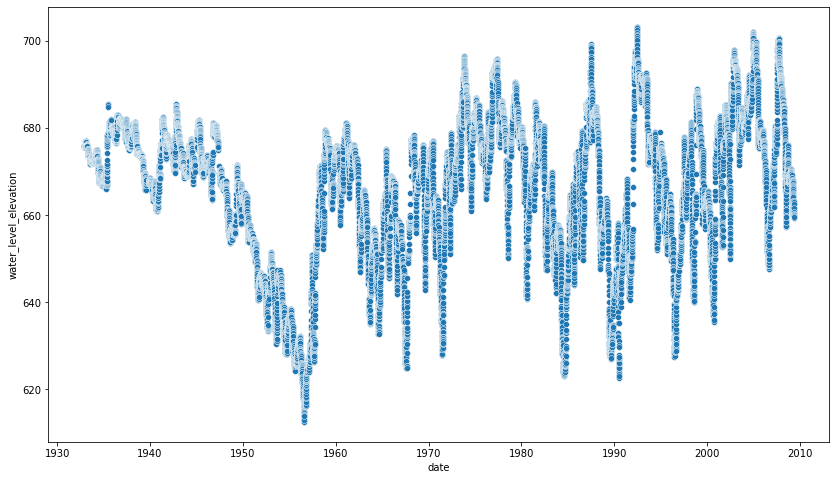

In [38]:
sns.scatterplot(data = df_to_daily_resample, y='water_level_elevation', x ='date')

<AxesSubplot:xlabel='population', ylabel='water_level_elevation'>

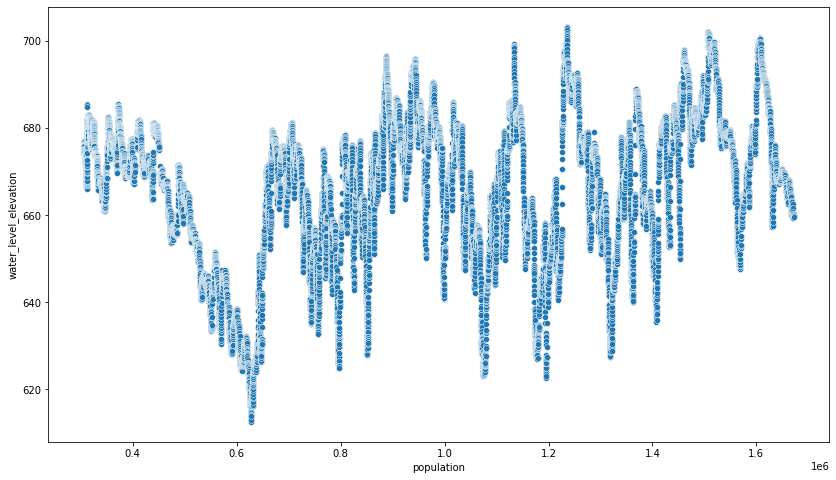

In [39]:
sns.scatterplot(data = df_to_daily_resample, y='water_level_elevation', x ='population')

<AxesSubplot:xlabel='precipitation', ylabel='water_level_elevation'>

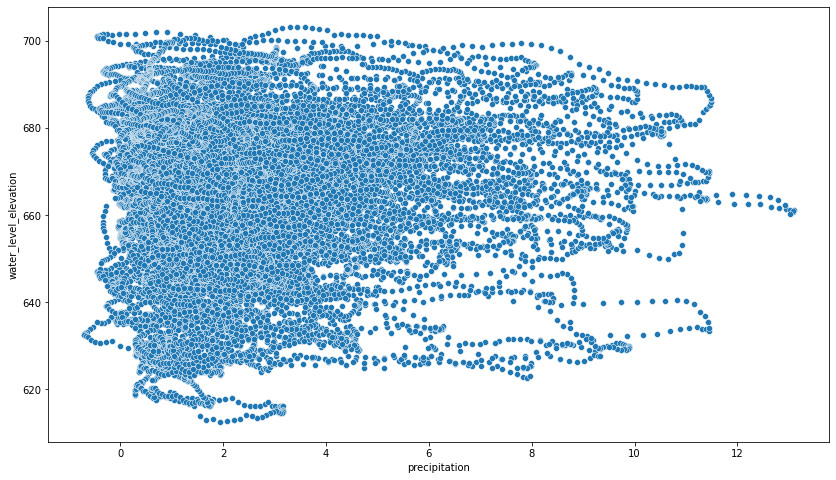

In [40]:
sns.scatterplot(data = df_to_daily_resample, y='water_level_elevation', x ='precipitation')

<AxesSubplot:xlabel='total_water_consumption', ylabel='temp'>

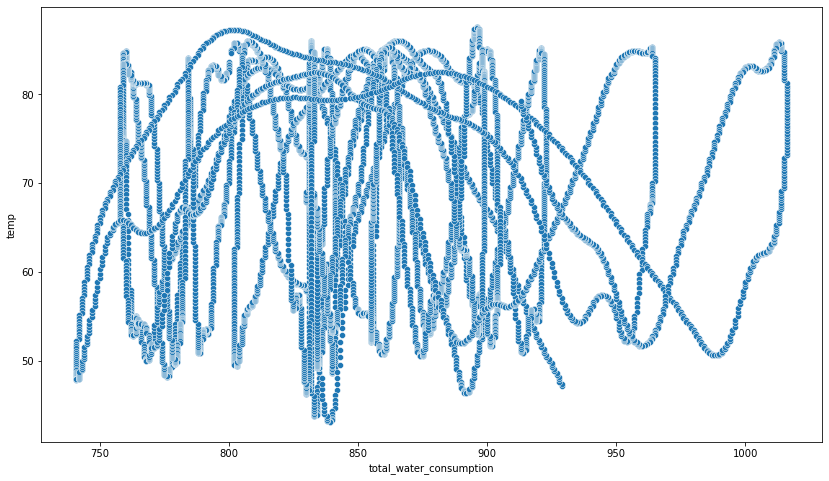

In [41]:
sns.scatterplot(data = df_to_daily_resample[(df_to_daily_resample.index.year >1983) & (df_to_daily_resample.index.year < 2019)], y='temp', x ='total_water_consumption')

Now I will take the same data and resample it to yearly to see how it compares.

In [42]:
df_to_yearly_resample = train.copy()
df_to_yearly_resample = df_to_yearly_resample.resample('A').mean()

In [43]:
df_to_yearly_resample['temp'] = (weather.avg_monthly_temp.resample('A').mean()).interpolate(method='polynomial',order =2)
df_to_yearly_resample['precipitation'] = (weather.total_monthly_precip.resample('A').mean()).interpolate(method='polynomial', order=2)
df_to_yearly_resample['total_water_consumption'] = (usage.total_consumption.resample('A').mean()).interpolate(method='polynomial', order=2).astype('int64')
df_to_yearly_resample['population'] = (pop.resample('A').mean()).interpolate(method='polynomial', order=2).astype('int64')

<AxesSubplot:xlabel='date', ylabel='water_level_elevation'>

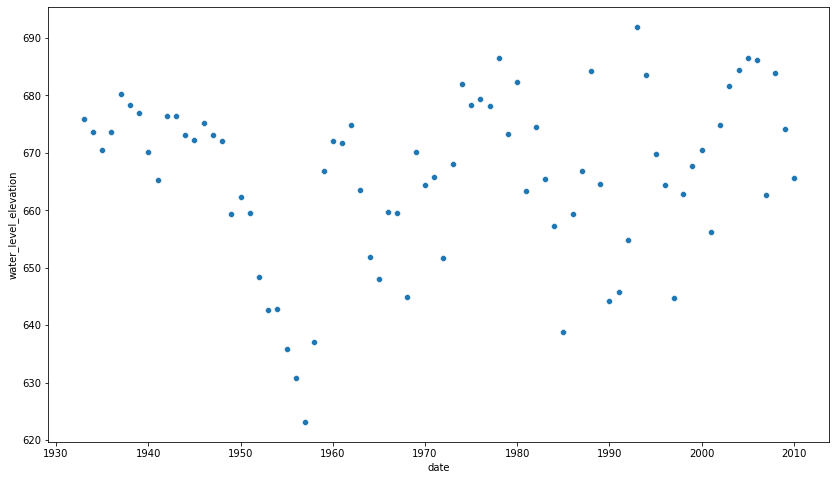

In [44]:
sns.scatterplot(data = df_to_yearly_resample, y='water_level_elevation', x ='date', )

<AxesSubplot:xlabel='population', ylabel='water_level_elevation'>

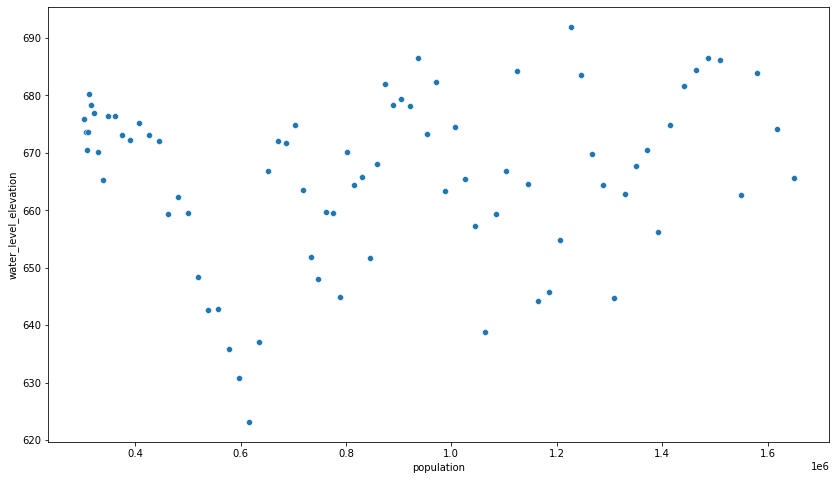

In [45]:
sns.scatterplot(data = df_to_yearly_resample, y='water_level_elevation', x ='population')

<AxesSubplot:xlabel='precipitation', ylabel='water_level_elevation'>

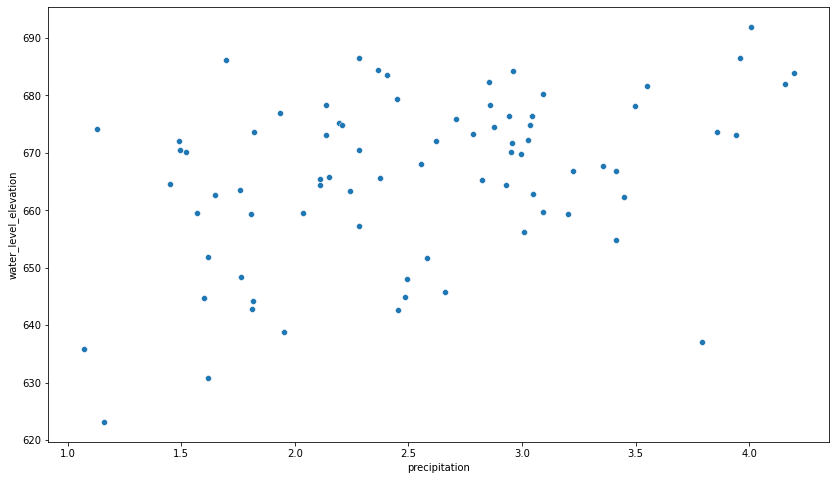

In [46]:
sns.scatterplot(data = df_to_yearly_resample, y='water_level_elevation', x ='precipitation')

<AxesSubplot:xlabel='total_water_consumption', ylabel='water_level_elevation'>

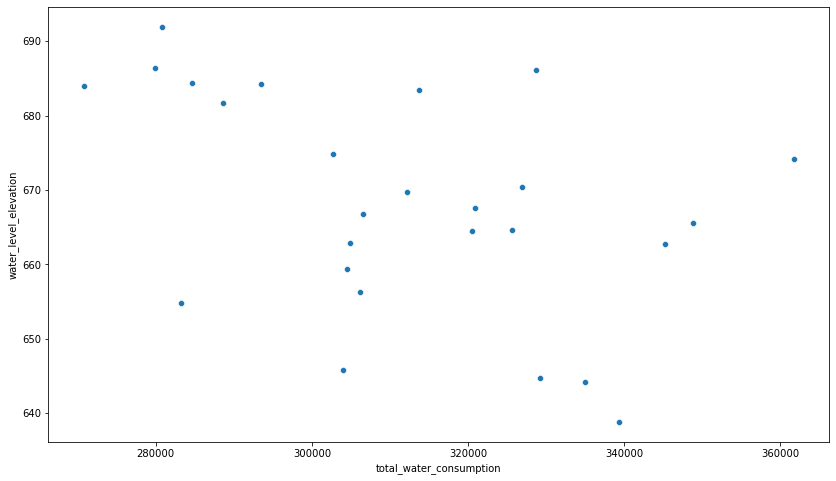

In [47]:
sns.scatterplot(data = df_to_yearly_resample, y='water_level_elevation', x ='total_water_consumption')

The only graph that looks correlated with the aquifer water level is precipitation. I'm going to run resample aquifer to monthly to match the total_monthly_precip data I have and run an lmplot to see.

In [48]:
monthly_resample = train.resample('M').mean()
monthly_resample['avg_monthly_temp'] = weather.avg_monthly_temp.resample('M').mean()
monthly_resample['total_monthly_precip'] = weather.total_monthly_precip.resample('M').mean()

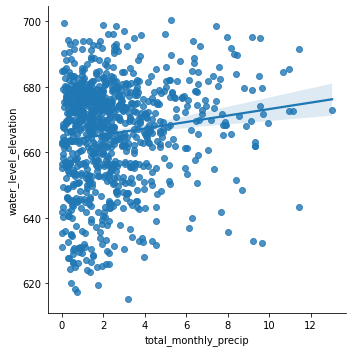

In [49]:
sns.lmplot(data = monthly_resample.dropna(), y='water_level_elevation', x ='total_monthly_precip')

This looks somewhat promising so I want to do a pearson's r correlation test on some of these relationships and more.

## Correlation testing

##### Hypothesis 1
alpha = .05

$H_{0}$ = There is no linear correlation between aquifer water level elevation and precipitation when observing at the monthly level.

$H_{a}$ = There is a linear correlation between aquifer water level elevation and precipitation when observing at the monthly level.


In [50]:
# Setting alpha
alpha = .05

# Running a pearson-r correlation test, printing out if the result is statistically significant and the r correlation value.
corr, p = stats.pearsonr(monthly_resample.dropna().water_level_elevation, monthly_resample.dropna().total_monthly_precip)
p < alpha, corr

(True, 0.13412634812059754)

I can reject the null and accept that there is a positive correlation between water level elevation and precipitation but it's not very strong at just .134.

I now want to investigate to see if there are stronger correlations when looking at the data resampled to a larger time like yearly to see if the correlation is different. My thinking is that there may be a lag between time of precipitation and resulting water level elevation. Resampling to means of larger times will account for this more.

##### Hypothesis 2
alpha = .05

$H_{0}$ = There is no linear correlation between aquifer water level elevation and precipitation when observing at the annual level.

$H_{a}$ = There is a linear correlation between aquifer water level elevation and precipitation when observing at the annual level.


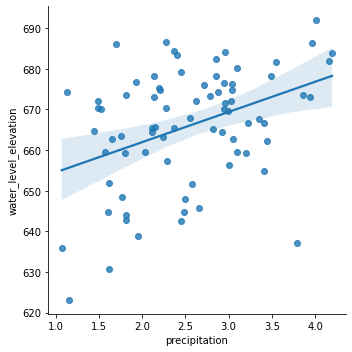

In [51]:
sns.lmplot(data = df_to_yearly_resample, y='water_level_elevation', x ='precipitation')

In [52]:
# Setting alpha
alpha = .05

# Running a pearson-r correlation test, printing out if the result is statistically significant and the r correlation value.
corr, p = stats.pearsonr(df_to_yearly_resample.water_level_elevation.dropna(), df_to_yearly_resample.precipitation.dropna())
p < alpha, corr

(True, 0.3933657899073637)

I can reject the null and accept that there is a positive correlation between water level elevation and precipitation when viewed at an annual level and moreso it's even stronger than looking at the monthly level at .393. To me this indicates there is a linkage but it be delayed due to time it takes for water to fill up the aquifer.

Upon reflection it may also be that water consumption decreases slightly after precipitation due to people not needing to pull water for tasks the rain took care of, eg. watering plants/lawns, irrigation, etc.  So I now want to look at the link between precipitation and water consumption.

##### Hypothesis 3
alpha = .05

$H_{0}$ = There is no linear correlation between total water consumption and precipitation when observing at the annual level.

$H_{a}$ = There is a linear correlation between total water consumption and precipitation when observing at the annual level.


In [53]:
# Setting alpha
alpha = .05

# Running a pearson-r correlation test, printing out if the result is statistically significant and the r correlation value.
corr, p = stats.pearsonr(df_to_yearly_resample.dropna().precipitation, df_to_yearly_resample.dropna().total_water_consumption)
p < alpha, corr

(True, -0.8373827539505967)

I can reject the null and find that there is a quite strong negative relationship in precipitation and water consumption when observing at the annual level. What this means is that as there is more rain, there is a decrease is water usage overall. The statistically significant r value here is -.837.

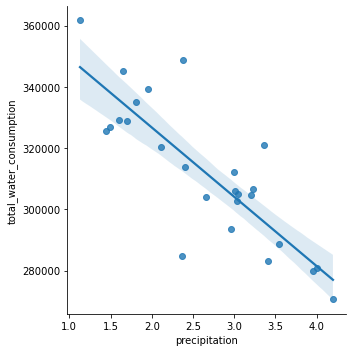

In [54]:
sns.lmplot(data = df_to_yearly_resample, y='total_water_consumption', x ='precipitation')

##### Hypothesis 4
alpha = .05

$H_{0}$ = There is no linear correlation between total water consumption and water_level_elevation when observing at the annual level.

$H_{a}$ = There is a linear correlation between total water consumption and water_level_elevation when observing at the annual level.


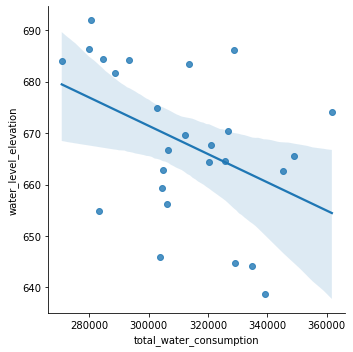

In [55]:
sns.lmplot(data = df_to_yearly_resample, x='total_water_consumption', y ='water_level_elevation')

In [56]:
# Setting alpha
alpha = .05

# Running a pearson-r correlation test, printing out if the result is statistically significant and the r correlation value.
corr, p = stats.pearsonr(df_to_yearly_resample.dropna().water_level_elevation.dropna(), df_to_yearly_resample.dropna().total_water_consumption)
p < alpha, corr

(True, -0.4374586621322173)

I can reject the null and find that there is a moderately strong negative relationship of -.437 in total_water_consumption and water_level_elevation when observing at the annual level. What this means is that as there is more water usage overall, there is a decrease is water level elevation.

Now I want to check to see if there is a statisically significant relationship between population and total water consumption.

##### Hypothesis 5
alpha = .05

$H_{0}$ = There is no linear correlation between water_level_elevation and population when observing at the annual level.

$H_{a}$ = There is a linear correlation between water_level_elevation and population when observing at the annual level.


In [57]:
# Setting alpha
alpha = .05

# Running a pearson-r correlation test, printing out if the result is statistically significant and the r correlation value.
corr, p = stats.pearsonr(df_to_yearly_resample.water_level_elevation.dropna(), df_to_yearly_resample.population.dropna())
p < alpha, corr

(False, 0.1290624506870563)

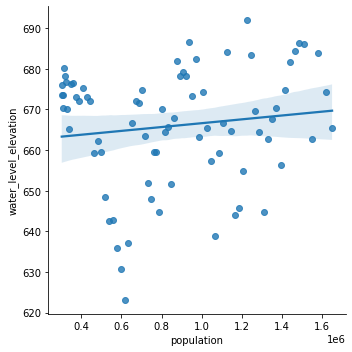

In [58]:
sns.lmplot(data = df_to_yearly_resample, y='water_level_elevation', x ='population')

I can't reject the null hypothesis, the current stats indicate there is no linear correlation between water level elevation and population.

## Takeaways from first part of EDA
- When observing data at a monthly level there is a positive correlation between water level elevation and precipitation but it's not very strong at just .134. 
- There is a positive correlation between water level elevation and precipitation when viewed at an annual level and moreso it's even stronger than looking at the monthly level at .393. To me this indicates there is a linkage but it indicatesthat increased precipitation may have a delayed effect before it affects water level elevation due to the time it takes for water to fill up the aquifer.
    - There may be confounding variables here as well; it may also be that water consumption decreases slightly after precipitation due to people not needing to pull water for tasks the rain took care of, eg. watering plants/lawns, irrigation, etc.
- Upon investigation, I find that there is a quite strong negative relationship in precipitation and water consumption when observing at the annual level. What this means is that as there is more rain, there is a decrease in water usage overall. The statistically significant r value here is -.837.
- I also found that there is a moderately strong negative relationship of -.437 in total_water_consumption and water_level_elevation when observing at the annual level. What this means is that as there is more water usage overall, there is a decrease is water level elevation.
- Finally, I determined that there is no statistically significant relationship between population and water level elevation. I don't really understand this as I would think that higher populations would result in using more water, thus lowering the water level.


## Exploring the time data more fully

Looking for seasonality, trend, autocorrelation, stationarity, normality etc.

## Plots not considering the time

In [59]:
y = train.water_level_elevation
y.head()

date
1932-11-12    675.60
1932-11-13    675.82
1932-11-14    675.97
1932-11-15    675.92
1932-11-16    675.74
Name: water_level_elevation, dtype: float64

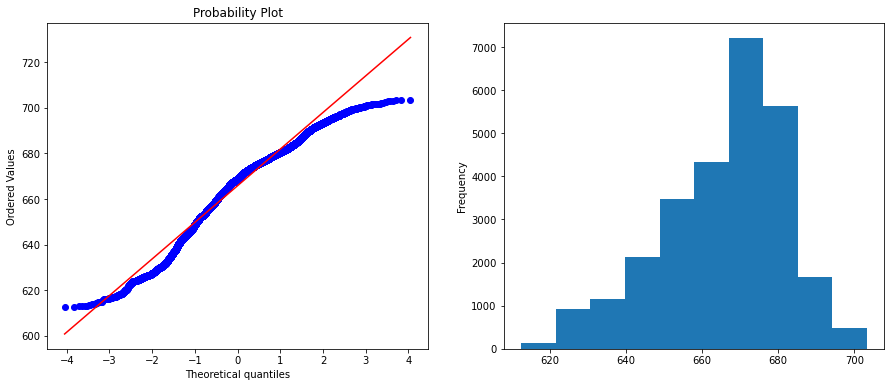

In [60]:
# QQ (Quantile-Quantile Plot) Showcases how well the data approximates a normal distribution as well as a histogram
plt.figure(figsize=(15,6))
plt.subplot(121)
stats.probplot(train.water_level_elevation, plot = pylab)
plt.subplot(122)
y.plot(kind='hist')
plt.show()

Between the two graphs above we can see that the train data shows a somewhat normal distribution with a slight left skew.


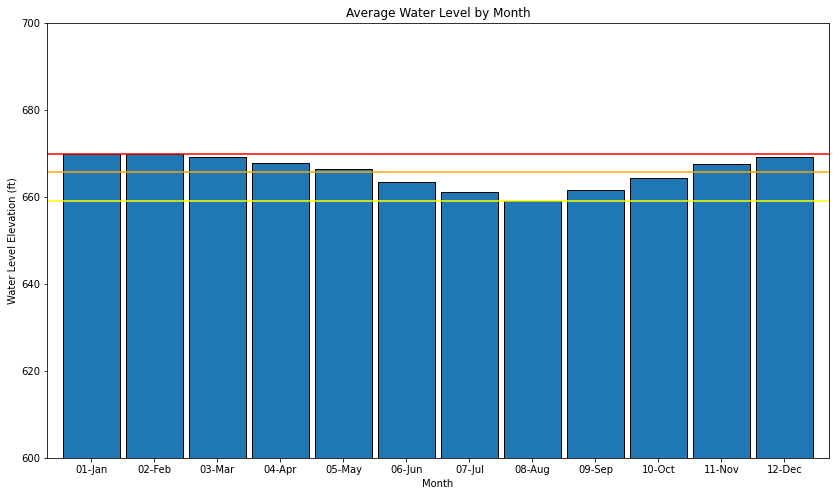

In [61]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Water Level by Month', xlabel='Month', ylabel='Water Level Elevation (ft)')
plt.axhline(y.groupby(y.index.strftime('%m-%b')).mean().mean(), color='orange')
plt.axhline(y.groupby(y.index.strftime('%m-%b')).mean().max(), color='red')
plt.axhline(y.groupby(y.index.strftime('%m-%b')).mean().min(), color='yellow')
plt.ylim(600,700)
plt.show()

In [62]:
# Calculating the swing between the highest month and lowest month
y.groupby(y.index.strftime('%m-%b')).mean().max() - y.groupby(y.index.strftime('%m-%b')).mean().min()

10.796549366997624

There is a slight water level dip around the summer months which I've exaggerated some by setting the y-value of the graph to start at 600 to show the difference more clearly. This may become more apparent when looking at seasonality later.

The difference between the highest and lowest month means is about 10 feet.

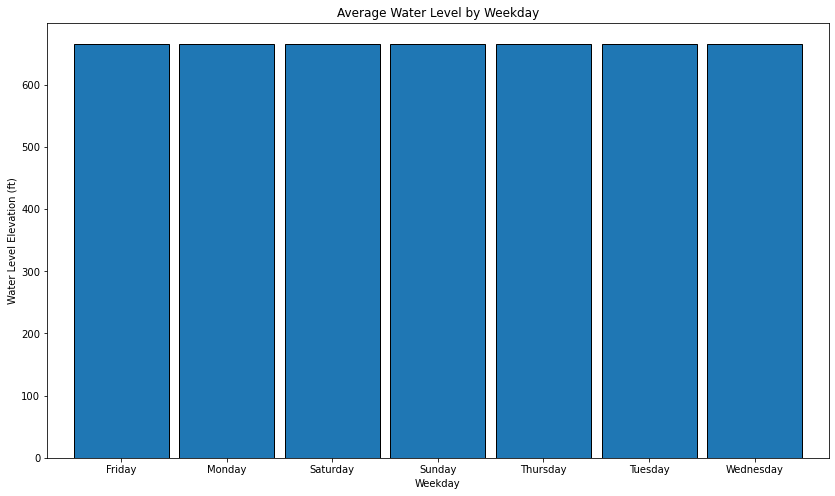

In [63]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
plt.title('Average Water Level by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Water Level Elevation (ft)')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='water_level_elevation'>

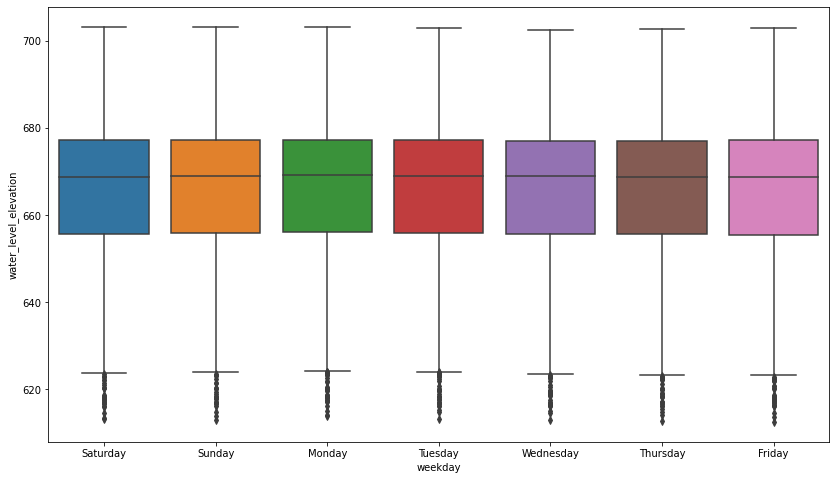

In [64]:
sns.boxplot(data = y.reset_index().assign(weekday=lambda df: df.date.dt.day_name()), x = 'weekday', y = 'water_level_elevation')

### Takeaways from plots not considering time
- The train data shows a somewhat normal distribution with a slight left skew
- There is a slight water level dip around the summer months. This may become more apparent when looking at seasonality later.

## Visualizing with plots that take time into account

<AxesSubplot:xlabel='date'>

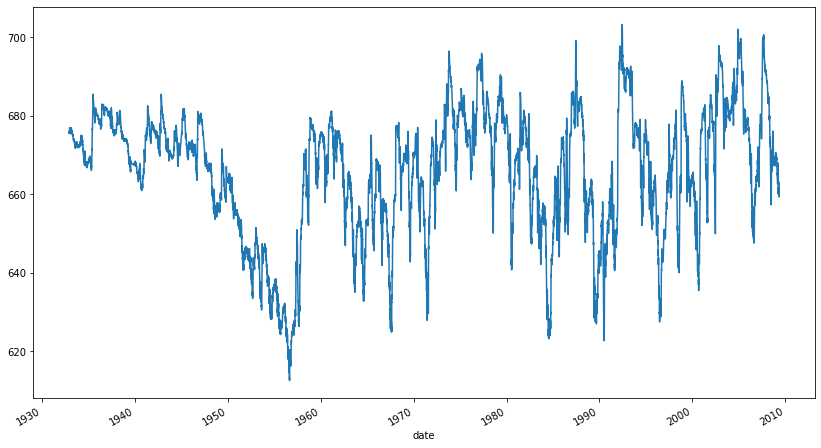

In [65]:
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='date'>

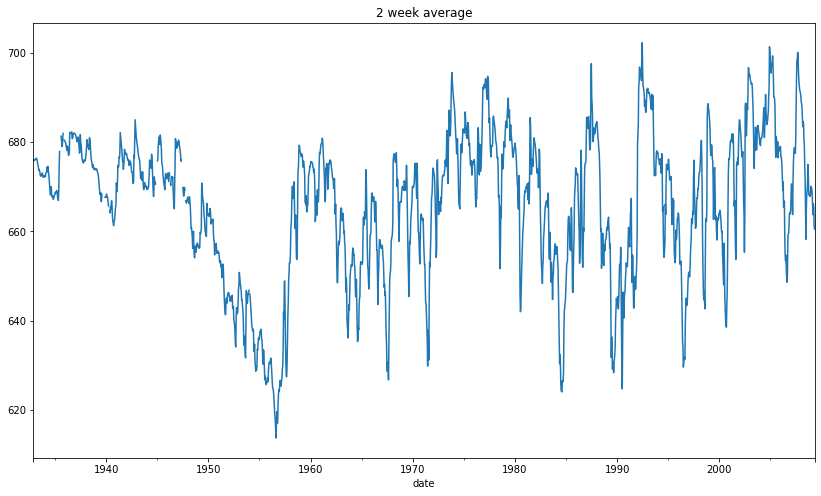

In [66]:
y.resample('2W').mean().plot(title='2 week average')

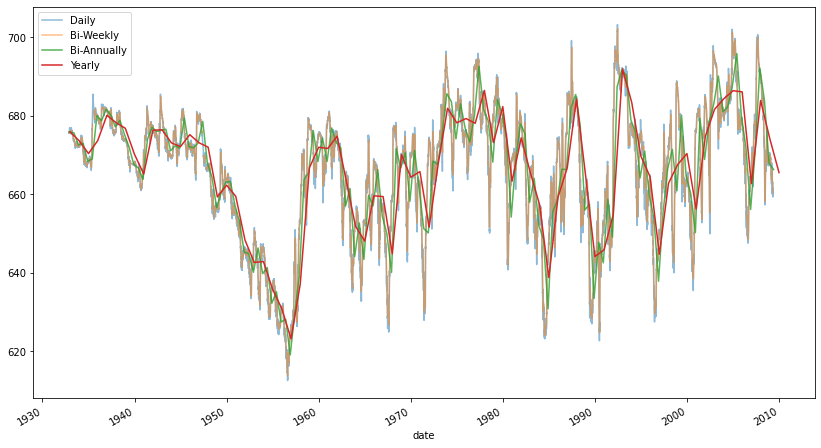

In [67]:
# Resampling to see how aggregation smooths out the overall flow.
y.plot(alpha=.5, label='Daily')
y.resample('2W').mean().plot(alpha=.5, label='Bi-Weekly')
y.resample('6M').mean().plot(alpha=.8, label='Bi-Annually')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

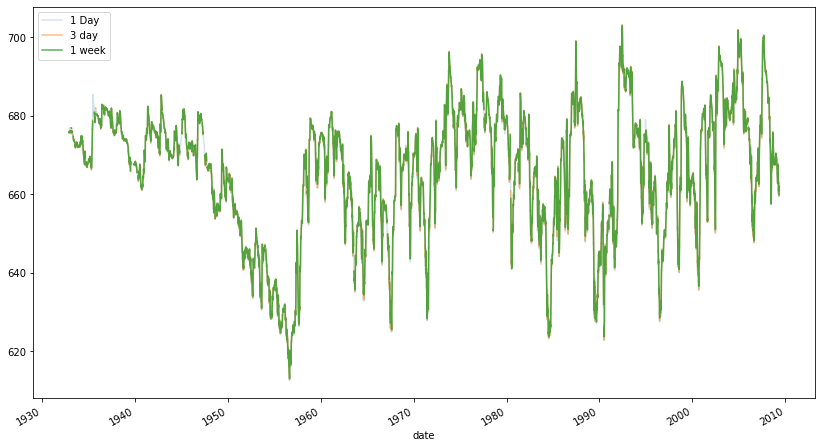

In [68]:
# Using a rolling mean to get a better sense of the data over time
y.plot(alpha=.2, label='1 Day')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

Resampling and rolling averages don't seem to really tell us anything useful or new about the data.

## Visualizing the change over time

<AxesSubplot:title={'center':'Average week-to-week change in water level elevation'}, xlabel='date'>

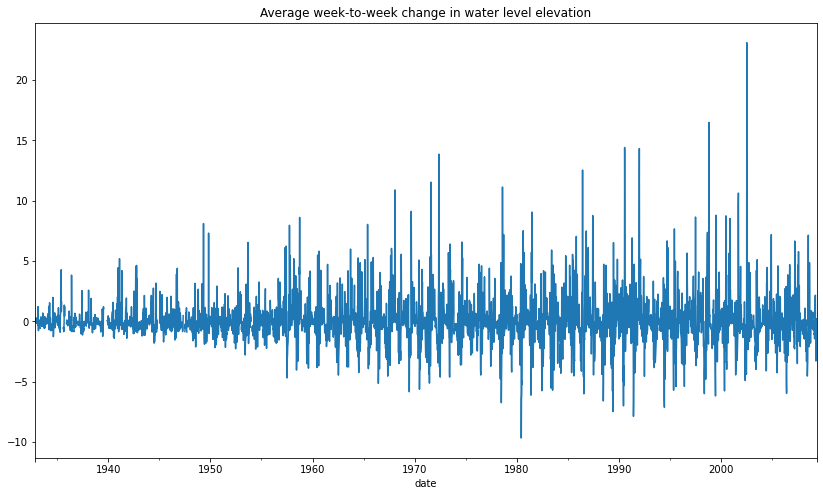

In [69]:
# Change week to week
y.resample('W').mean().diff().plot(title='Average week-to-week change in water level elevation')


<AxesSubplot:title={'center':'Average month-to-month change in water level elevation'}, xlabel='date'>

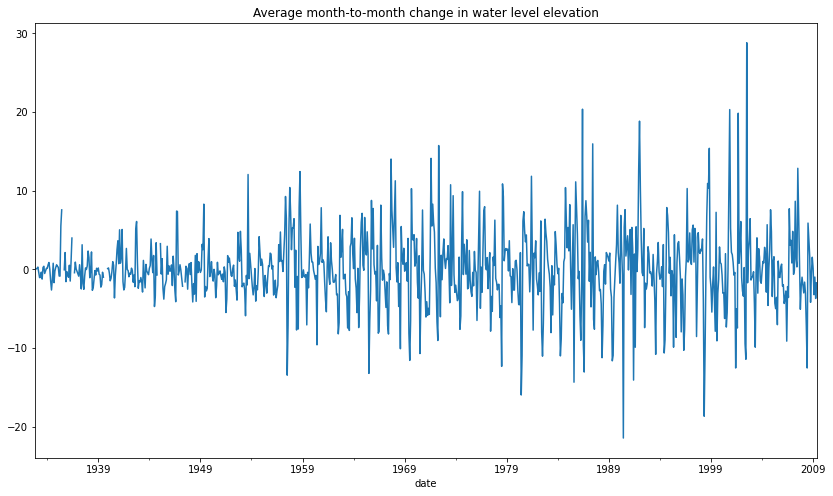

In [70]:
# Change month to month
y.resample('M').mean().diff().plot(title='Average month-to-month change in water level elevation')

Here I notice some heteroskedasticity. Both the weekly and monthly change over time looks like the water level has exhibited higher variability as time has gone on. Specifically it looks like things got way more variable around 1957/58.


## Seasonal Plots

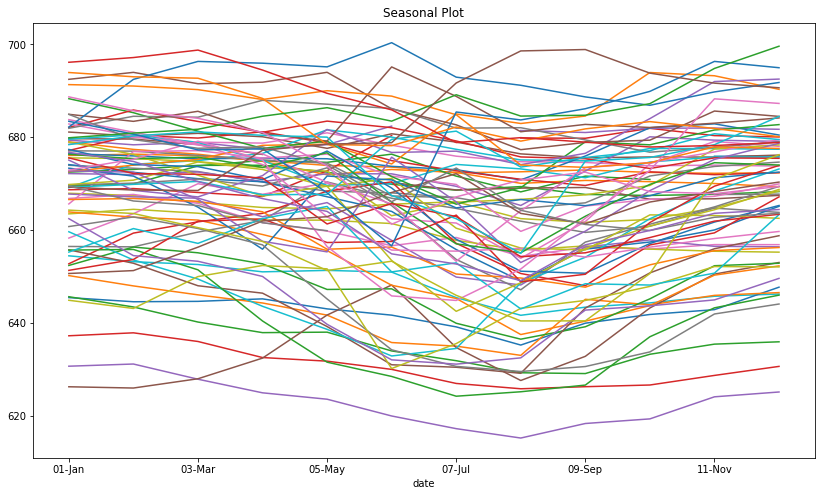

In [71]:
# Checking for yearly seasonality when observing by the year
y.groupby([y.index.year, y.index.strftime('%m-%b')]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend().remove()

This plot is too messy to make any sense of so I'm going to look at seasonal trends by the decade.

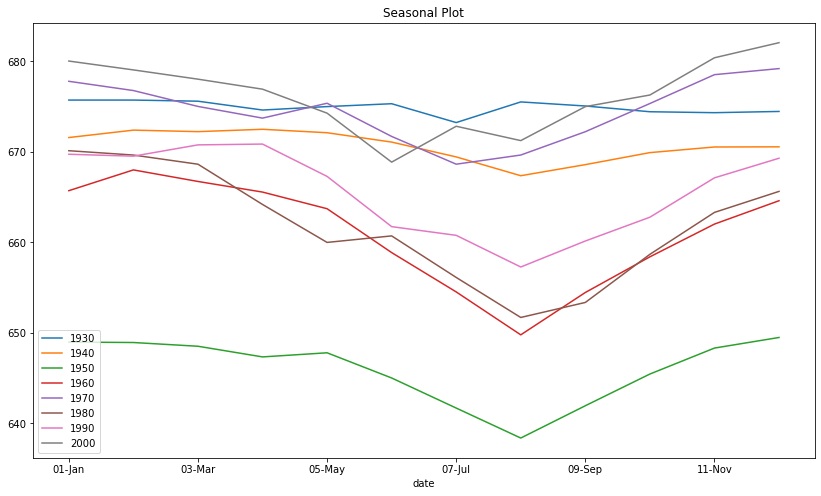

In [72]:
# Checking for yearlyseasonality when observing by the decade
y.groupby([(y.index.year//10)*10, y.index.strftime('%m-%b')]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(loc='lower left')
plt.show()

This looks much better and seems to indicate that there is a general summer dip in water level elevation.

#### Seasonal Subseries Plot groubed by decades

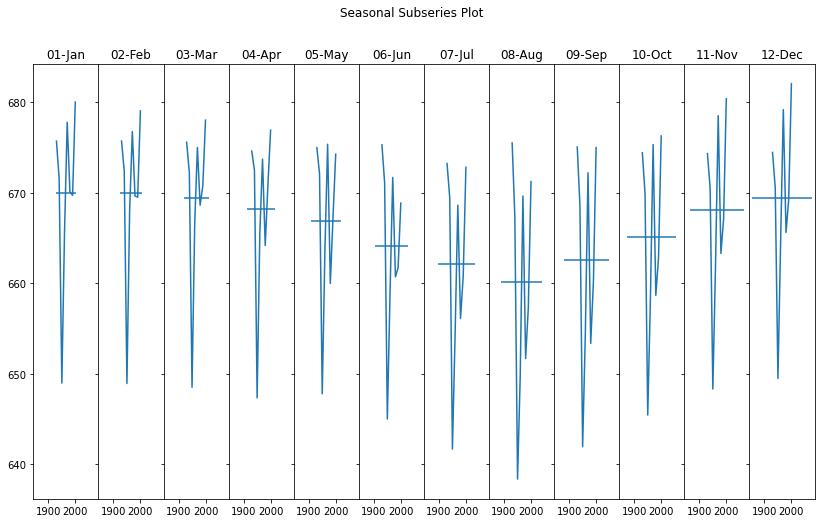

In [73]:
table = y.groupby([(y.index.year//10)*10, y.index.strftime('%m-%b')]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### Lag plots

Text(0.5, 1.0, 'Lag plot with lag=1 Day')

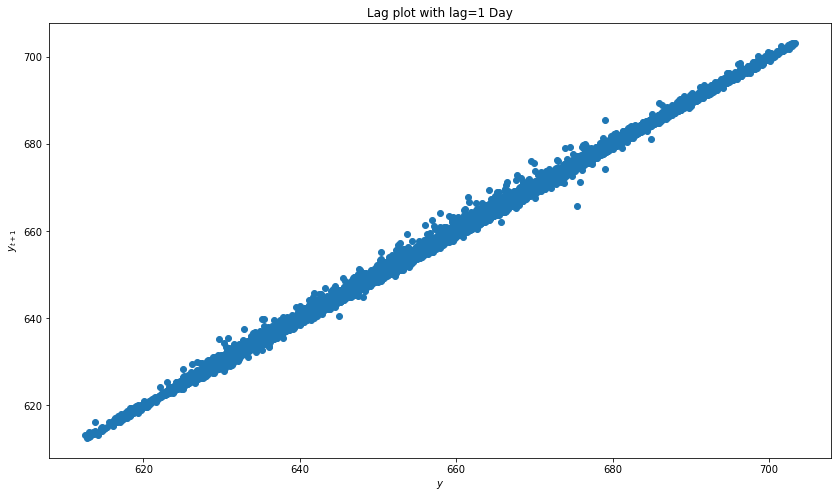

In [74]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 Day')

This lag plot shows in general there in not much change from one day to the next.

Text(0.5, 1.0, 'Lag plot with lag=1 week')

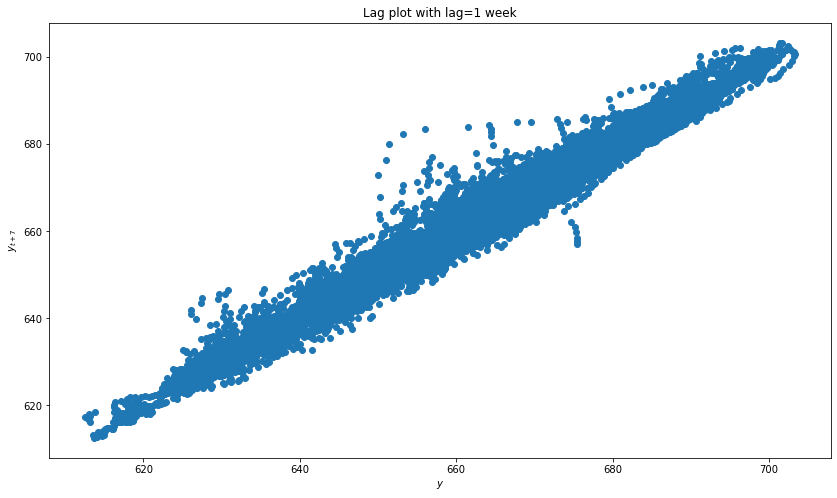

In [75]:
plt.scatter(y, y.shift(-7))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 7}$')
plt.title('Lag plot with lag=1 week')

This lag plot shows that from week to week there is a larger amount of variability but it's still not that drastic and it close to  a 1:1 correlation.

Text(0.5, 1.0, 'Lag plot with lag=1 month')

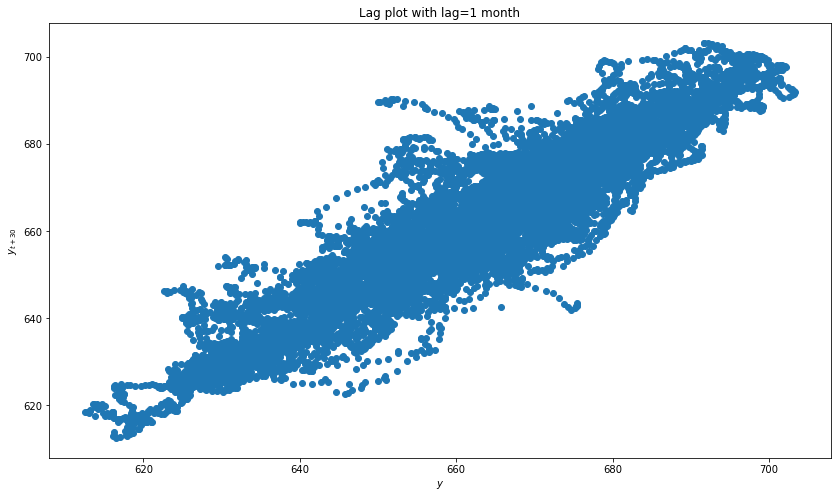

In [76]:
plt.scatter(y, y.shift(-30))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 30}$')
plt.title('Lag plot with lag=1 month')

At 1 month out the water level experiences more variability but definitely still correlated.

Text(0.5, 1.0, 'Lag plot with lag=6 months')

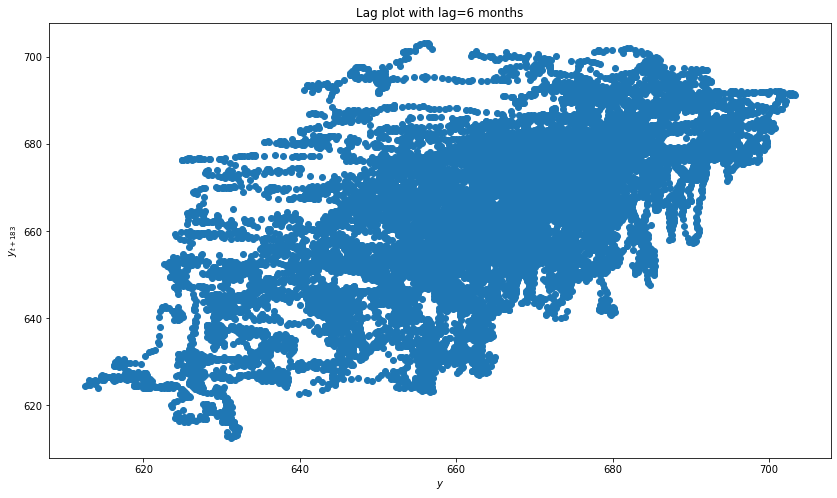

In [77]:
plt.scatter(y, y.shift(-183))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 183}$')
plt.title('Lag plot with lag=6 months')

At half a year lag time, even greater variability is present.

Text(0.5, 1.0, 'Lag plot with lag=1 year')

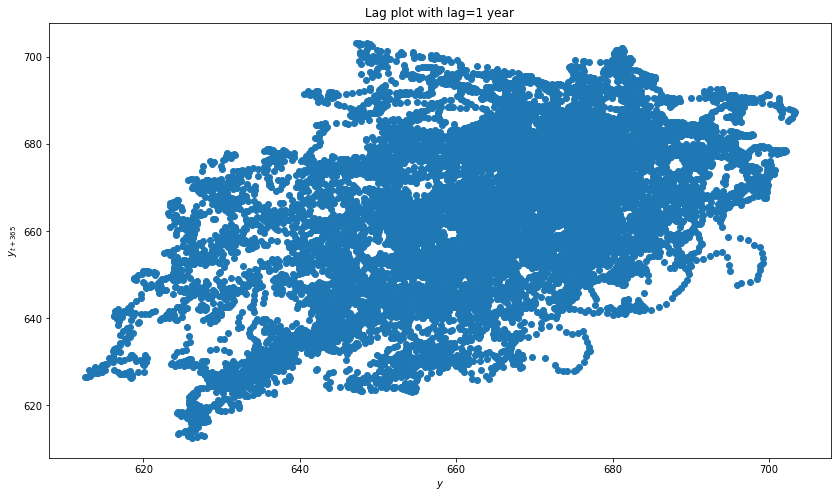

In [78]:
plt.scatter(y, y.shift(-365))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 365}$')
plt.title('Lag plot with lag=1 year')

At one year lag it doesn't really look all that different than the 6 month lag time.

Text(0.5, 1.0, 'Lag plot with lag=2 Years')

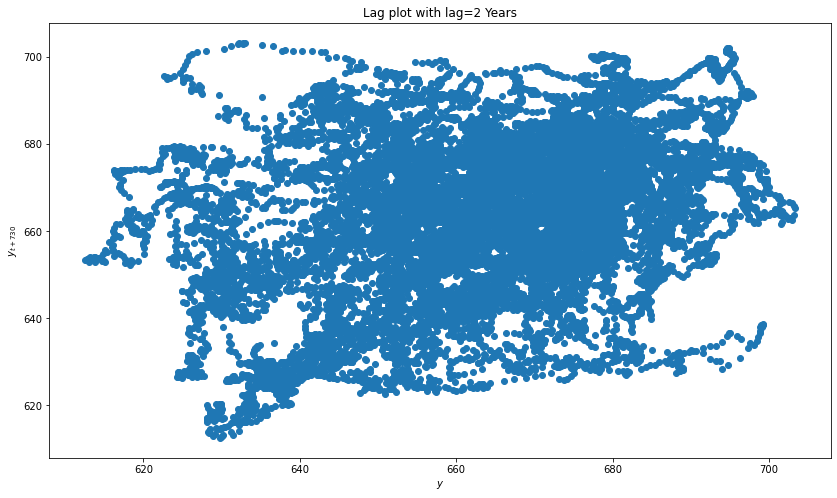

In [79]:
plt.scatter(y, y.shift(-730))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 730}$')
plt.title('Lag plot with lag=2 Years')

Text(0.5, 1.0, 'Lag plot with lag=5 Years')

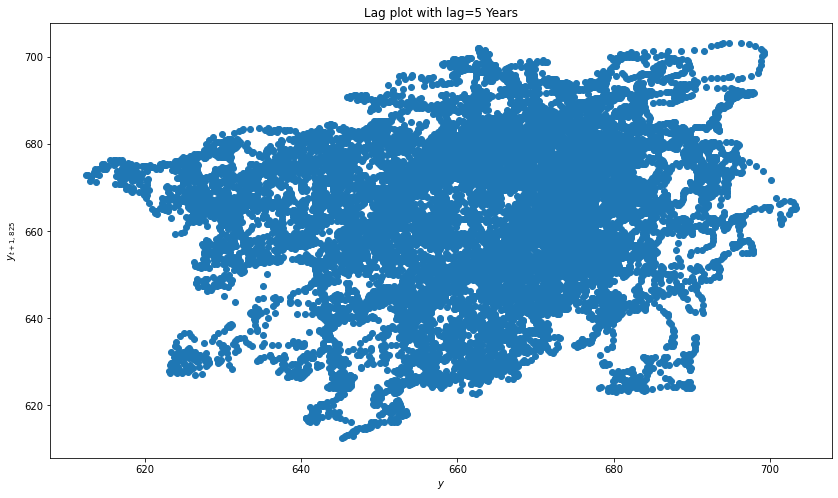

In [80]:
plt.scatter(y, y.shift(-1825))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1,825}$')
plt.title('Lag plot with lag=5 Years')

Text(0.5, 1.0, 'Lag plot with lag=10 Years')

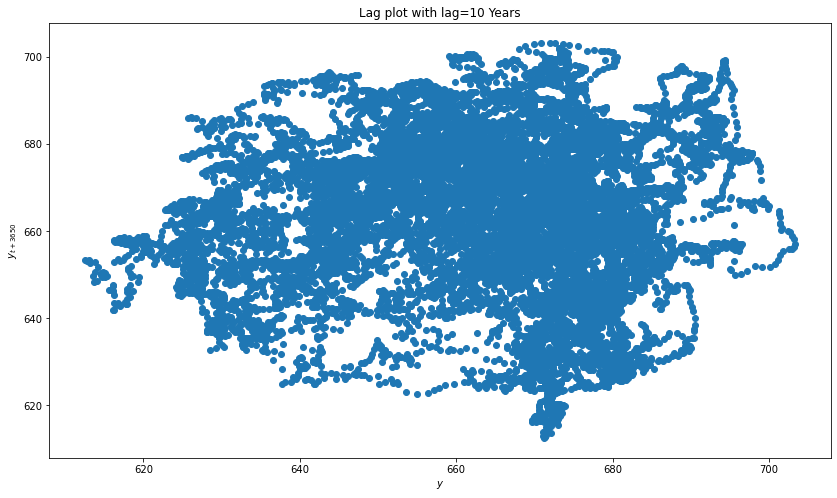

In [81]:
plt.scatter(y, y.shift(-3650))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 3650}$')
plt.title('Lag plot with lag=10 Years')

At 6 months and beyond the relationship starts to look more "blobby" and random. 

### Takeaways from lag plot
- From day to day and week to week there is very little daily or weekly change in aquifer levels.
- The water level when it does change seems to do so gradually over time rather than drastic 1 day or 1 week or even 1 month changes even.
- Major differences don't show up until looking beyond 6 months.

## Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

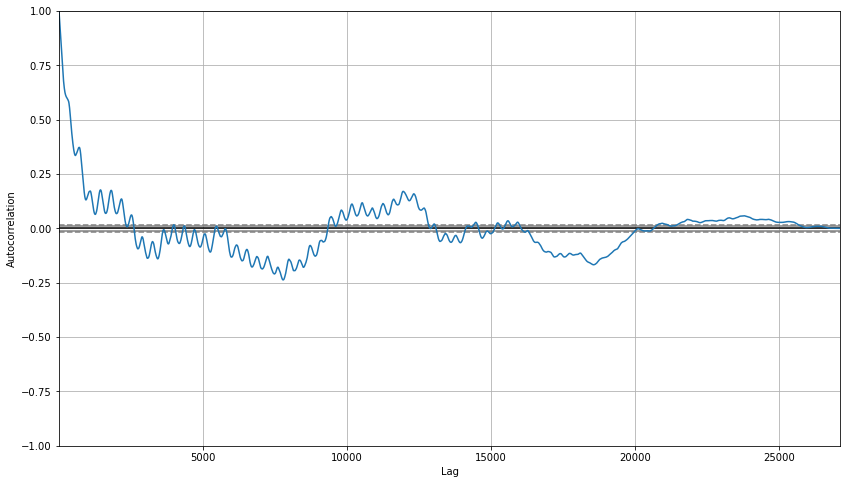

In [82]:
pd.plotting.autocorrelation_plot(y)

This autocorrelation plot doesn't seem to indicate any specific seasonality or regularity that I can pick up on outside of the yearly seasonal swings of summer to winter.

## Seasonal Decomposition

In [83]:
y = train.water_level_elevation.asfreq('W', method = 'bfill')


In [84]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

y  trend  seasonal  resid
date                                      
1932-11-13  675.82    NaN -3.709882    NaN
1932-11-20  675.97    NaN -3.100407    NaN
1932-11-27  675.92    NaN -2.343108    NaN
1932-12-04  675.64    NaN -1.720218    NaN
1932-12-11  677.00    NaN -0.982621    NaN

<AxesSubplot:xlabel='date'>

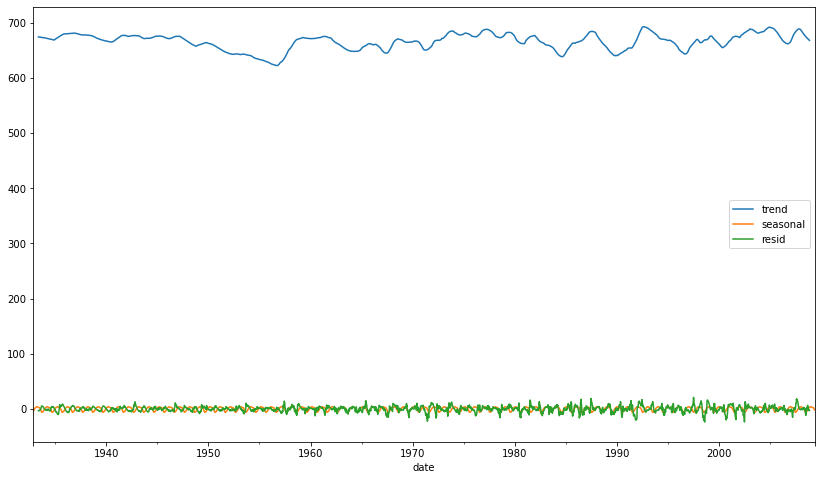

In [85]:
decomposition.iloc[:, 1:].plot()

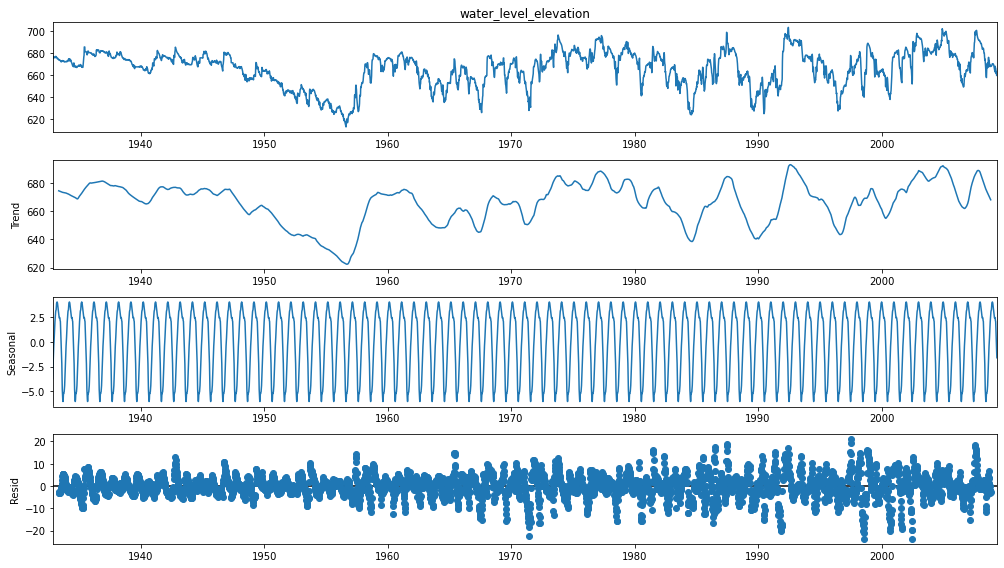

In [86]:
result.plot()
None

From this graph it looks as though the "Trend" accounts for most of the variation seen.

- Noteworthy: The seasonal effects seem to show a roughly 9 foot swing from the highest point which shown previously occurs in the winter months to the lowest point in the summer months. This matches well with the mean highs and lows seen previously.

In [87]:
# create a categorical feature
train['temp_bin'] = pd.qcut(train.water_level_elevation, 3, labels=['low','medium', 'high'])
train.groupby('temp_bin').water_level_elevation.mean()

C:\Users\Andrew\AppData\Local\Temp/ipykernel_23436/3352919044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['temp_bin'] = pd.qcut(train.water_level_elevation, 3, labels=['low','medium', 'high'])


temp_bin
low       646.811688
medium    668.713863
high      681.909577
Name: water_level_elevation, dtype: float64

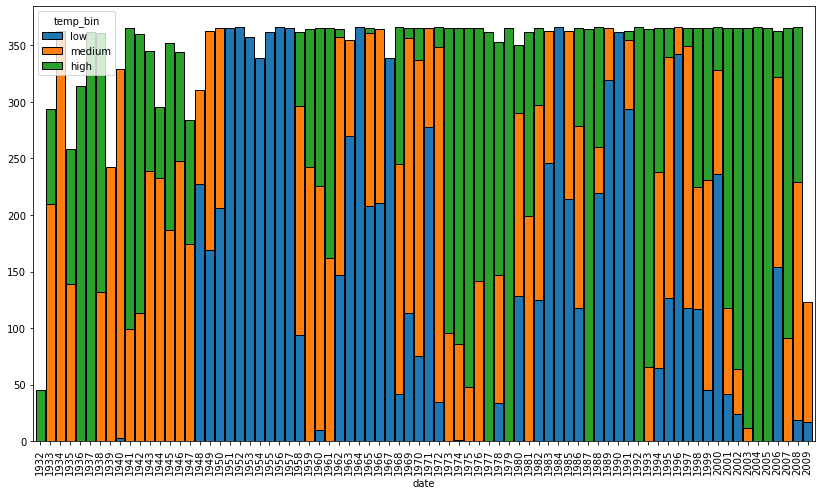

In [88]:
ax = (train.groupby('temp_bin')
 .resample('Y')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

# EDA Takeaways

- Target Variable Aquifer water level elevation with time:
    - The annual seasonality shows a roughly 9 foot swing from the highest point in the winter months to the lowest point in the summer months. 
    - The "trend" tends to look more random than predictable up or down.
    - The daily, weekly and monthly variations tend to be quite small. Meaning the water level for today is quite predictive for the next day, the next week and the next month. Beyond this it spreads out considerably. Changes in water level elevation seem to be small changes added over time; this can result in bigger differences over larger time spans.
- Target Variable with other variables:
    - There is a positive correlation between water level elevation and precipitation when viewed at an annual level with an r of .393. To me this indicates there is a linkage but the effects of increased precipitation may be delayed due to the time it takes for water to fill up the aquifer.
    - I find that there is a quite strong negative relationship in precipitation and water consumption when observing at the annual level. What this means is that as there is more rain, there is a decrease in water usage overall. The statistically significant r value here is -.837.
    - I also found that there is a moderately strong negative relationship of -.437 in total_water_consumption and water_level_elevation when observing at the annual level. What this means is that as there is more water usage overall, there is a decrease is water level elevation.
    - **Main Takeaway from this**: As it rains it helps the water level rise for at least two reasons:
    1) Less Water is consumed
    2) Water is replenished into the aquifer